**<h1 align="center">Sales Forecasting</h1>**

Problem at hand is a multi-output regression time series data 

Outline of steps:
- Analyse the heatmaps & graphs from market data
- Coherence in sales data and the relevant market data features
- Feature engeneering (skip for now maybe?)
- Split the data 
- Outliers 
- Missing values
- Encoding? 
- Scaling
- Feature selection

I'm confused

<a class="anchor" id="chapter1"></a>

# 1. Data Exploration

</a>

<a class="anchor" id="sub-section-1_1"></a>

## 1.1. Imports

</a>

In [693]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi

# Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

# Scaling
from sklearn.preprocessing import MinMaxScaler

In [694]:
# Configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Force normal decimal formatting
pd.options.display.float_format = '{:.4f}'.format

In [695]:
# Visualisations 
sns.set_style("white")
siemens_green = '#009999'
siemens_colors = ['#009999', '#006666', '#00CCCC']

In [696]:
# Import xlsx dataset into pandas dataframe
market_data = pd.read_excel('../Data/Case2_Market data.xlsx', header=[0,1,2])

# Import csv dataset into pandas dataframe
sales_data = pd.read_csv('../Data/Case2_Sales data.csv', sep=";")

<a class="anchor" id="sub-section-1_2"></a>

## 1.2. Market Data

</a>

In [697]:
market_data.head()

Unnamed: 0_level_0  \
  Index 2010=100 (if not otherwise noted)   
                                     date   
0                                  2004m2   
1                                  2004m3   
2                                  2004m4   
3                                  2004m5   
4                                  2004m6   

                                     China  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO156   
0                                  16.9407   
1                                  23.7119   
2                                  24.4352   
3                                  23.7081   
4                                  27.0091   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP156   
0                                 16.9407   
1                                 23.7119   
2                                 24.4352   
3                                 23.7081   
4                                 27.0091   

                                    France  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO250   
0                                 112.0913   
1                                 136.3280   
2                                 117.7918   
3                                 109.0025   
4                                 133.7857   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP250   
0                                 83.4589   
1                                106.1682   
2                                 92.0076   
3                                 85.6965   
4                                106.6415   

                                   Germany  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO276   
0                                  82.6230   
1                                 100.5566   
2                                  89.6532   
3                                  86.8806   
4                                  99.0108   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP276   
0                                 79.4525   
1                                 97.0129   
2                                 84.9324   
3                                 82.3728   
4                                 95.1087   

                                     Italy  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO380   
0                                 124.2896   
1                                 143.4117   
2                                 129.0838   
3                                 135.5904   
4                                 136.4249   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP380   
0                                 86.5605   
1                                106.3445   
2                                 95.5797   
3                                100.0870   
4                                110.8897   

                                     Japan  \
  Production Index Machinery & Electricals   
                            MAB_ELE_PRO392   
0                                 109.3340   
1                                 140.8846   
2                                 105.8536   
3                                 101.8648   
4                                 120.3329   

                                           \
  Shipments Index Machinery & Electricals   
                           MAB_ELE_SHP392   
0                                110.4953   
1                                144.6862   
2                                102.6558   
3                                100.3053   
4                                119.6164   

            

| Feature            | Description |
|----------------|------------------------------------------|
| date            | Index 2010 = 100 (if not otherwise noted) |
| MAB_ELE_PRO156 | China Production Index Machinery & Electricals |
| MAB_ELE_SHP156 | China Shipments Index Machinery & Electricals |
| MAB_ELE_PRO250 | France Production Index Machinery & Electricals |
| MAB_ELE_SHP250 | France Shipments Index Machinery & Electricals |
| MAB_ELE_PRO276 | Germany Production Index Machinery & Electricals |
| MAB_ELE_SHP276 | Germany Shipments Index Machinery & Electricals |
| MAB_ELE_PRO380 | Italy Production Index Machinery & Electricals |
| MAB_ELE_SHP380 | Italy Shipments Index Machinery & Electricals |
| MAB_ELE_PRO392 | Japan Production Index Machinery & Electricals |
| MAB_ELE_SHP392 | Japan Shipments Index Machinery & Electricals |
| MAB_ELE_PRO756 | Switzerland Production Index Machinery & Electricals |
| MAB_ELE_SHP756 | Switzerland Shipments Index Machinery & Electricals |
| MAB_ELE_PRO826 | United Kingdom Production Index Machinery & Electricals |
| MAB_ELE_SHP826 | United Kingdom Shipments Index Machinery & Electricals |
| MAB_ELE_PRO840 | United States Production Index Machinery & Electricals |
| MAB_ELE_SHP840  | United States Shipments Index Machinery & Electricals |
| MAB_ELE_PRO1100 | Europe Production Index Machinery & Electricals |
| MAB_ELE_SHP1100 | Europe Shipments Index Machinery & Electricals |
| RohiBASEMET1000_org | World: Price of Base Metals |
| RohiENERGY1000_org  | World: Price of Energy |
| RohiMETMIN1000_org  | World: Price of Metals & Minerals |
| RohiNATGAS1000_org  | World: Price of Natural Gas Index |
| RohCRUDE_PETRO1000_org | World: Price of Crude Oil, Average |
| RohCOPPER1000_org | World: Price of Copper |
| WKLWEUR840_org | United States: EUR in LCU |
| PRI27840_org | Producer Prices: United States Electrical Equipment |
| PRI27826_org | Producer Prices: United Kingdom Electrical Equipment |
| PRI27380_org | Producer Prices: Italy Electrical Equipment |
| PRI27250_org | Producer Prices: France Electrical Equipment |
| PRI27276_org | Producer Prices: Germany Electrical Equipment |
| PRI27156_org | Producer Prices: China Electrical Equipment |
| PRO28840_org | Production index: United States Machinery and Equipment n.e.c. |
| PRO281000_org   | Production index: World Machinery and Equipment n.e.c. |
| PRO28756_org    | Production index: Switzerland Machinery and Equipment n.e.c. |
| PRO28826_org    | Production index: United Kingdom Machinery and Equipment n.e.c. |
| PRO28380_org    | Production index: Italy Machinery and Equipment n.e.c. |
| PRO28392_org    | Production index: Japan Machinery and Equipment n.e.c. |
| PRO28250_org    | Production index: France Machinery and Equipment n.e.c. |
| PRO28276_org    | Production index: Germany Machinery and Equipment n.e.c. |
| PRO27840_org    | Production index: United States Electrical Equipment |
| PRO271000_org   | Production index: World Electrical Equipment |
| PRO27756_org    | Production index: Switzerland Electrical Equipment |
| PRO27826_org    | Production index: United Kingdom Electrical Equipment |
| PRO27380_org    | Production index: Italy Electrical Equipment |
| PRO27392_org    | Production index: Japan Electrical Equipment |
| PRO27250_org    | Production index: France Electrical Equipment |
| PRO27276_org    | Production index: Germany Electrical Equipment |

In [698]:
# Keep only the third header row (index 2) and remove contextual information
market_data.columns = market_data.columns.droplevel([0,1])
market_data.head()

date  MAB_ELE_PRO156  MAB_ELE_SHP156  MAB_ELE_PRO250  MAB_ELE_SHP250  \
0   2004m2         16.9407         16.9407        112.0913         83.4589   
1   2004m3         23.7119         23.7119        136.3280        106.1682   
2   2004m4         24.4352         24.4352        117.7918         92.0076   
3   2004m5         23.7081         23.7081        109.0025         85.6965   
4   2004m6         27.0091         27.0091        133.7857        106.6415   

   MAB_ELE_PRO276  MAB_ELE_SHP276  MAB_ELE_PRO380  MAB_ELE_SHP380  \
0         82.6230         79.4525        124.2896         86.5605   
1        100.5566         97.0129        143.4117        106.3445   
2         89.6532         84.9324        129.0838         95.5797   
3         86.8806         82.3728        135.5904        100.0870   
4         99.0108         95.1087        136.4249        110.8897   

   MAB_ELE_PRO392  MAB_ELE_SHP392  MAB_ELE_PRO756  MAB_ELE_SHP756  \
0        109.3340        110.4953         91.2219         89.9873   
1        140.8846        144.6862         85.8663         79.8836   
2        105.8536        102.6558         85.6225         79.7408   
3        101.8648        100.3053         85.3787         79.5980   
4        120.3329        119.6164         85.1349         79.4552   

   MAB_ELE_PRO826  MAB_ELE_SHP826  MAB_ELE_PRO840  MAB_ELE_SHP840  \
0        111.3538         73.6013        107.6014         79.2402   
1        127.5586         84.0476        110.1874         98.6190   
2        108.7323         73.0260        108.1666         89.7740   
3        110.6452         74.5919        108.4259         87.4638   
4        122.0210         82.3433        110.5699         97.3645   

   MAB_ELE_PRO1100  MAB_ELE_SHP1100  RohiBASEMET1000_org  RohiENERGY1000_org  \
0          97.1229          80.0985              54.0398             44.1233   
1         113.7839          96.0159              54.6662             47.5890   
2         101.7152          85.1672              54.8727             47.7790   
3         101.2757          84.4858              51.2304             53.5909   
4         112.0572          96.9633              52.8763             50.7996   

   RohiMETMIN1000_org  RohiNATGAS1000_org  RohCRUDE_PETRO1000_org  \
0             48.7479             87.0770                 39.6395   
1             49.2562             87.1927                 42.5920   
2             49.4238             91.3799                 42.6506   
3             46.4684             99.0445                 47.5171   
4             47.8039             98.6363                 44.9676   

   RohCOPPER1000_org  WKLWEUR840_org  PRI27840_org  PRI27826_org  \
0            36.6238          1.2646       78.9699       80.7574   
1            39.9311          1.2262       79.6736       80.9621   
2            39.1349          1.1985       80.3376       80.7574   
3            36.2784          1.2007       80.7988       80.7574   
4            35.6574          1.2138       80.9135       80.5527   

   PRI27380_org  PRI27250_org  PRI27276_org  PRI27156_org  PRO28840_org  \
0       93.0200           NaN       93.2305           NaN      102.4917   
1       93.5403           NaN       93.3357           NaN      105.6275   
2       93.8524           NaN       93.4409           NaN      103.4850   
3       93.8524           NaN       93.5461           NaN      103.6439   
4       93.9565           NaN       93.4409           NaN      106.0627   

   PRO281000_org  PRO28756_org  PRO28826_org  PRO28380_org  PRO28392_org  \
0        97.5974       97.1000      106.1920      116.7903      110.8900   
1       113.2249       91.1951      121.6251      139.2884      141.1769   
2       100.1691       93.7935      104.9655      125.2896      105.6488   
3        99.5814       96.3920      105.8854      131.9890      101.9904   
4       109.2777       98.9904      118.2523      132.9889      122.1366   

   PRO28250_org  PRO28276_org  PRO27840_org  PRO271000_org  PRO27756_org  \
0  

In [699]:
market_data.tail()

date  MAB_ELE_PRO156  MAB_ELE_SHP156  MAB_ELE_PRO250  MAB_ELE_SHP250  \
214  2021m12        310.7632        310.7632        100.5657        134.5895   
215   2022m1        235.9561        235.9561         85.7435        108.1563   
216   2022m2        235.9561        235.9561         90.6035        117.7158   
217   2022m3        329.4134        329.4134        107.8435        136.8587   
218   2022m4        267.3731        267.3731         87.6981        116.5287   

     MAB_ELE_PRO276  MAB_ELE_SHP276  MAB_ELE_PRO380  MAB_ELE_SHP380  \
214        118.1033        149.3643         94.0068        150.4827   
215         94.5506        120.3534         86.8510        101.2583   
216        103.9879        129.3837        106.5838        120.9565   
217        121.3081        151.2013        124.6380        153.6451   
218         99.5222        127.0229        103.5567        128.7333   

     MAB_ELE_PRO392  MAB_ELE_SHP392  MAB_ELE_PRO756  MAB_ELE_SHP756  \
214        127.7717        131.0297        106.7040        104.8192   
215        110.4602        110.8235        103.4993        101.7016   
216        117.8796        118.3002        100.2945         98.5840   
217        152.0006        156.4006         97.0897         95.4663   
218        114.2623        115.0120             NaN             NaN   

     MAB_ELE_PRO826  MAB_ELE_SHP826  MAB_ELE_PRO840  MAB_ELE_SHP840  \
214        101.2735             NaN        107.0408        148.5904   
215         95.0035             NaN        111.0521        129.5658   
216         98.4584             NaN        116.3363        138.5603   
217        121.9939             NaN        117.6540        165.9262   
218         95.2665             NaN        116.9610             NaN   

     MAB_ELE_PRO1100  MAB_ELE_SHP1100  RohiBASEMET1000_org  \
214         123.0767         150.0469             125.2070   
215         103.1998         120.3381             133.2194   
216         113.5006         131.5001             138.9056   
217         133.1330         158.0556             149.8909   
218         112.9022         134.9355             146.0910   

     RohiENERGY1000_org  RohiMETMIN1000_org  RohiNATGAS1000_org  \
214            112.3730            116.7152            236.4884   
215            121.3099            125.2296            196.9111   
216            131.2732            131.1765            197.5237   
217            163.1868            141.2833            271.0799   
218            153.1889            138.0941            243.4360   

     RohCRUDE_PETRO1000_org  RohCOPPER1000_org  WKLWEUR840_org  PRI27840_org  \
214                 92.1887           126.7612          1.1304      128.5113   
215                106.1731           129.8291          1.1314      131.6285   
216                118.3482           131.9636          1.1342      133.3422   
217                142.2009           135.7822          1.1019      136.1538   
218                130.8354           134.8597          1.0819      137.5316   

     PRI27826_org  PRI27380_org  PRI27250_org  PRI27276_org  PRI27156_org  \
214           NaN      113.3096      108.1825      115.7489       98.1062   
215           NaN      115.3906      111.0375      117.8534       98.2802   
216           NaN      116.4311      112.0571      118.9056       98.7142   
217           NaN      117.4716      112.3630      119.8527       99.0216   
218           NaN      118.4080      113.2807      121.2206       98.8571   

     PRO28840_org  PRO281000_org  PRO28756_org  PRO28826_org  PRO28380_org  \
214      105.7367       134.5988      102.2775       90.3501      103.1914   
215      110.8944       117.4899      100.3052       85.4442       92.2923   
216      117.1682       124.6278       98.3329       89.0214      113.2906   
217      118.9109       149.3752       96.3606      109.1559      134.2888   
218      119.3855       128.2857           NaN       84.7287      111.0907   

     PRO28392_org  PRO28250_org  PRO28276_org  PRO27840_o

The start of the market data is February 2004 and the end is in April 2022.

In [700]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    219 non-null    object 
 1   MAB_ELE_PRO156          219 non-null    float64
 2   MAB_ELE_SHP156          219 non-null    float64
 3   MAB_ELE_PRO250          219 non-null    float64
 4   MAB_ELE_SHP250          219 non-null    float64
 5   MAB_ELE_PRO276          219 non-null    float64
 6   MAB_ELE_SHP276          219 non-null    float64
 7   MAB_ELE_PRO380          219 non-null    float64
 8   MAB_ELE_SHP380          219 non-null    float64
 9   MAB_ELE_PRO392          219 non-null    float64
 10  MAB_ELE_SHP392          219 non-null    float64
 11  MAB_ELE_PRO756          218 non-null    float64
 12  MAB_ELE_SHP756          218 non-null    float64
 13  MAB_ELE_PRO826          219 non-null    float64
 14  MAB_ELE_SHP826          201 non-null    fl

In [701]:
# Standardize the string format
market_data['date'] = market_data['date'].str.strip().str.replace('m', '-')

# Convert 
market_data['date'] = pd.to_datetime(market_data['date'], format='%Y-%m').dt.to_period('M')


In [702]:
# Check the data type
print(market_data['date'].dtypes)
market_data.head(2)

period[M]


date  MAB_ELE_PRO156  MAB_ELE_SHP156  MAB_ELE_PRO250  MAB_ELE_SHP250  \
0  2004-02         16.9407         16.9407        112.0913         83.4589   
1  2004-03         23.7119         23.7119        136.3280        106.1682   

   MAB_ELE_PRO276  MAB_ELE_SHP276  MAB_ELE_PRO380  MAB_ELE_SHP380  \
0         82.6230         79.4525        124.2896         86.5605   
1        100.5566         97.0129        143.4117        106.3445   

   MAB_ELE_PRO392  MAB_ELE_SHP392  MAB_ELE_PRO756  MAB_ELE_SHP756  \
0        109.3340        110.4953         91.2219         89.9873   
1        140.8846        144.6862         85.8663         79.8836   

   MAB_ELE_PRO826  MAB_ELE_SHP826  MAB_ELE_PRO840  MAB_ELE_SHP840  \
0        111.3538         73.6013        107.6014         79.2402   
1        127.5586         84.0476        110.1874         98.6190   

   MAB_ELE_PRO1100  MAB_ELE_SHP1100  RohiBASEMET1000_org  RohiENERGY1000_org  \
0          97.1229          80.0985              54.0398             44.1233   
1         113.7839          96.0159              54.6662             47.5890   

   RohiMETMIN1000_org  RohiNATGAS1000_org  RohCRUDE_PETRO1000_org  \
0             48.7479             87.0770                 39.6395   
1             49.2562             87.1927                 42.5920   

   RohCOPPER1000_org  WKLWEUR840_org  PRI27840_org  PRI27826_org  \
0            36.6238          1.2646       78.9699       80.7574   
1            39.9311          1.2262       79.6736       80.9621   

   PRI27380_org  PRI27250_org  PRI27276_org  PRI27156_org  PRO28840_org  \
0       93.0200           NaN       93.2305           NaN      102.4917   
1       93.5403           NaN       93.3357           NaN      105.6275   

   PRO281000_org  PRO28756_org  PRO28826_org  PRO28380_org  PRO28392_org  \
0        97.5974       97.1000      106.1920      116.7903      110.8900   
1       113.2249       91.1951      121.6251      139.2884      141.1769   

   PRO28250_org  PRO28276_org  PRO27840_org  PRO271000_org  PRO27756_org  \
0      118.2741       80.8290      117.7240            NaN       81.1000   
1      148.1218      102.1301      119.2208            NaN       76.6903   

   PRO27826_org  PRO27380_org  PRO27392_org  PRO27250_org  PRO27276_org  
0      120.7065      141.5109      106.1613      102.0771       85.9132  
1      138.3095      152.8802      140.2887      117.2257       97.6708

In [703]:
# Confrim start and end dates
market_data['date'].min(), market_data['date'].max()

(Period('2004-02', 'M'), Period('2022-04', 'M'))

In [704]:
# Set the date as index
#market_data = market_data.set_index('date')

In [705]:
# Check the shape
market_data.shape

(219, 48)

In [706]:
# Get statistics
market_data.describe()

MAB_ELE_PRO156  MAB_ELE_SHP156  MAB_ELE_PRO250  MAB_ELE_SHP250  \
count        219.0000        219.0000        219.0000        219.0000   
mean         138.3036        138.3036        104.4319        105.3168   
std           78.8832         78.8832         18.9185         12.7622   
min           16.9407         16.9407         50.7567         64.4207   
25%           68.4777         68.4777         93.6135         97.4528   
50%          133.5077        133.5077        102.7366        106.0122   
75%          198.4739        198.4739        114.0909        115.0305   
max          329.4134        329.4134        152.7434        136.8587   

       MAB_ELE_PRO276  MAB_ELE_SHP276  MAB_ELE_PRO380  MAB_ELE_SHP380  \
count        219.0000        219.0000        219.0000        219.0000   
mean         107.4991        114.8984        105.2284        105.7354   
std           11.8619         17.0916         23.5096         19.9482   
min           74.3329         71.7872         34.2134         45.1917   
25%          100.5609        103.1498         94.3352         95.9858   
50%          108.9923        117.4288        105.0885        107.6958   
75%          115.7358        127.1122        117.0317        119.8364   
max          130.8700        151.2971        153.9408        153.6451   

       MAB_ELE_PRO392  MAB_ELE_SHP392  MAB_ELE_PRO756  MAB_ELE_SHP756  \
count        219.0000        219.0000        218.0000        218.0000   
mean         111.9481        112.6706         97.8345         94.7849   
std           15.4893         16.8919          8.2415          9.1539   
min           67.5319         64.3723         77.8015         74.6393   
25%          103.7400        103.4532         92.4102         88.2210   
50%          111.6830        112.5973         97.5731         94.3768   
75%          121.4027        121.4981        103.8771        100.7365   
max          153.8987        159.4959        116.6746        115.3211   

       MAB_ELE_PRO826  MAB_ELE_SHP826  MAB_ELE_PRO840  MAB_ELE_SHP840  \
count        219.0000        201.0000        219.0000        218.0000   
mean         108.7529         95.9571        109.4183        114.1600   
std           12.0967         12.9462          7.8913         14.6334   
min           61.0480         57.4629         85.9944         79.2402   
25%          100.4984         86.1997        104.6000        104.5965   
50%          108.9110         97.8689        110.1536        115.7134   
75%          118.0018        105.2696        114.5854        123.4200   
max          137.6826        126.3385        126.6508        165.9262   

       MAB_ELE_PRO1100  MAB_ELE_SHP1100  RohiBASEMET1000_org  \
count         219.0000         219.0000             219.0000   
mean          108.7800         110.5511              89.7333   
std            11.8395          15.7279              20.8101   
min            69.7866          71.1589              50.8220   
25%           101.7296          98.5880              76.5905   
50%           110.3838         111.9541              88.3904   
75%           115.8325         121.6139             104.3784   
max           134.2162         158.0556             149.8909   

       RohiENERGY1000_org  RohiMETMIN1000_org  RohiNATGAS1000_org  \
count            219.0000            219.0000            219.0000   
mean              92.5580             86.0649            103.3678   
std               30.6154             21.4108             41.7474   
min               31.6323             46.4684             33.9923   
25%               69.9283             71.9569             72.5948   
50%               86.2849             85.0702            100.2854   
75%              120.7204            100.7957            119.1734   
max              173.4836            141.2833            271.0799   

       RohCRUDE_PETRO1000_org  RohCOPPER1000_org  WKLWEUR840_org  \
count                219.0000           219.0000        219.0000   
mean                  89.4465           

In [707]:
# Check for missing values
missing_values = market_data.isnull().sum()
missing_values[missing_values > 0]

MAB_ELE_PRO756     1
MAB_ELE_SHP756     1
MAB_ELE_SHP826    18
MAB_ELE_SHP840     1
PRI27826_org      18
PRI27250_org      35
PRI27156_org      23
PRO28756_org       1
PRO271000_org     11
PRO27756_org       1
dtype: int64

In [708]:
# Check duplicate rows
market_data[market_data.duplicated() == True]

Empty DataFrame
Columns: [date, MAB_ELE_PRO156, MAB_ELE_SHP156, MAB_ELE_PRO250, MAB_ELE_SHP250, MAB_ELE_PRO276, MAB_ELE_SHP276, MAB_ELE_PRO380, MAB_ELE_SHP380, MAB_ELE_PRO392, MAB_ELE_SHP392, MAB_ELE_PRO756, MAB_ELE_SHP756, MAB_ELE_PRO826, MAB_ELE_SHP826, MAB_ELE_PRO840, MAB_ELE_SHP840, MAB_ELE_PRO1100, MAB_ELE_SHP1100, RohiBASEMET1000_org, RohiENERGY1000_org, RohiMETMIN1000_org, RohiNATGAS1000_org, RohCRUDE_PETRO1000_org, RohCOPPER1000_org, WKLWEUR840_org, PRI27840_org, PRI27826_org, PRI27380_org, PRI27250_org, PRI27276_org, PRI27156_org, PRO28840_org, PRO281000_org, PRO28756_org, PRO28826_org, PRO28380_org, PRO28392_org, PRO28250_org, PRO28276_org, PRO27840_org, PRO271000_org, PRO27756_org, PRO27826_org, PRO27380_org, PRO27392_org, PRO27250_org, PRO27276_org]
Index: []

<a class="anchor" id="sub-section-1_3">

## 1.3. Sales Data
    
</a>

In [709]:
sales_data.head()

DATE Mapped_GCK Sales_EUR
0  01.10.2018         #1         0
1  02.10.2018         #1         0
2  03.10.2018         #1         0
3  04.10.2018         #1         0
4  05.10.2018         #1         0

In [710]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [711]:
sales_data.shape

(9802, 3)

<a class="anchor" id="sub-section-1_3_1">

### 1.3.1. Converting Data Types
    
</a>

Before using this dataset effectively, several preprocessing steps are necessary, including adjusting data types for consistency. Firstly, Sales_EUR should be converted to a float to enable numerical operations. Secondly, the DATE column must be formatted to match the date structure in the Market dataset.

**Sales_EUR**

In [712]:
# Turn into string, replace commas with periods, and remove leading/trailing whitespaces
sales_data['Sales_EUR'] = sales_data['Sales_EUR'].astype(str).str.replace(',', '.').str.strip()

# Convert to float
sales_data['Sales_EUR'] = pd.to_numeric(sales_data['Sales_EUR'])

# Check the data type
sales_data['Sales_EUR'].dtypes

dtype('float64')

In [713]:
sales_data['Sales_EUR'].describe()

count       9802.0000
mean      272785.6867
std      2230789.1619
min      -506381.1700
25%            0.0000
50%            0.0000
75%            0.0000
max     41127988.0200
Name: Sales_EUR, dtype: float64

**DATE**

In [714]:
# Convert to datetime with day first format
sales_data['DATE'] = sales_data['DATE'].apply(pd.to_datetime, dayfirst=True) 

# Check the data type
sales_data['DATE'].dtypes

dtype('<M8[ns]')

In [715]:
print('Oldest date in Sales Data:', sales_data['DATE'].min())
print('Newest date in Sales Data:', sales_data['DATE'].max())

Oldest date in Sales Data: 2018-10-01 00:00:00
Newest date in Sales Data: 2022-04-30 00:00:00


In [716]:
# Create column to match market data format
sales_data['date'] = pd.to_datetime(sales_data['DATE']).dt.to_period('M')


In [717]:
sales_data['date'].head()

0    2018-10
1    2018-10
2    2018-10
3    2018-10
4    2018-10
Name: date, dtype: period[M]

**Mapped_GCK**

In [718]:
ddtypes = {'Mapped_GCK': 'category'}
sales_data = sales_data.astype(ddtypes)

In [719]:
# Check the data type
sales_data['Mapped_GCK'].dtypes

CategoricalDtype(categories=['#1', '#11', '#12', '#13', '#14', '#16', '#20', '#3', '#36',
                  '#4', '#5', '#6', '#8', '#9'],
, ordered=False, categories_dtype=object)

<a class="anchor" id="sub-section-1_3_2">

### 1.3.2. Initial Analysis
    
</a>

In [720]:
sales_data.describe(include='all')

DATE Mapped_GCK     Sales_EUR     date
count                            9802       9802     9802.0000     9802
unique                            NaN         14           NaN       43
top                               NaN         #1           NaN  2021-03
freq                              NaN       1179           NaN      266
mean    2020-07-19 17:55:48.785961984        NaN   272785.6867      NaN
min               2018-10-01 00:00:00        NaN  -506381.1700      NaN
25%               2019-08-30 00:00:00        NaN        0.0000      NaN
50%               2020-07-26 12:00:00        NaN        0.0000      NaN
75%               2021-06-09 00:00:00        NaN        0.0000      NaN
max               2022-04-30 00:00:00        NaN 41127988.0200      NaN
std                               NaN        NaN  2230789.1619      NaN

In [721]:
# Check duplicate rows
sales_data[sales_data.duplicated() == True]

Empty DataFrame
Columns: [DATE, Mapped_GCK, Sales_EUR, date]
Index: []

In [722]:
# Check for missing values
missing_values = sales_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [723]:
# Check negative values, errors?
print(f'There are {len(sales_data[sales_data["Sales_EUR"] < 0])} cases of negative sales.')

There are 276 cases of negative sales.


<a class="anchor" id="sub-section-1_5">

## 1.5. Exploratory Data Analysis
    
</a>

<a class="anchor" id="sub-section-1_5_1">

### 1.5.1. Sales Volume
    
</a>

In [724]:
# Check the number of products
sales_data['Mapped_GCK'].nunique()
print(f'There are {sales_data["Mapped_GCK"].nunique()} different products in the dataset.')

There are 14 different products in the dataset.


In [725]:
# Check the distribution of the products by sales volume
sales_data['Mapped_GCK'].value_counts().sort_values(ascending=False)

Mapped_GCK
#1     1179
#3     1017
#5      959
#8      944
#4      877
#12     803
#6      794
#16     765
#11     732
#13     441
#36     434
#9      333
#20     293
#14     231
Name: count, dtype: int64

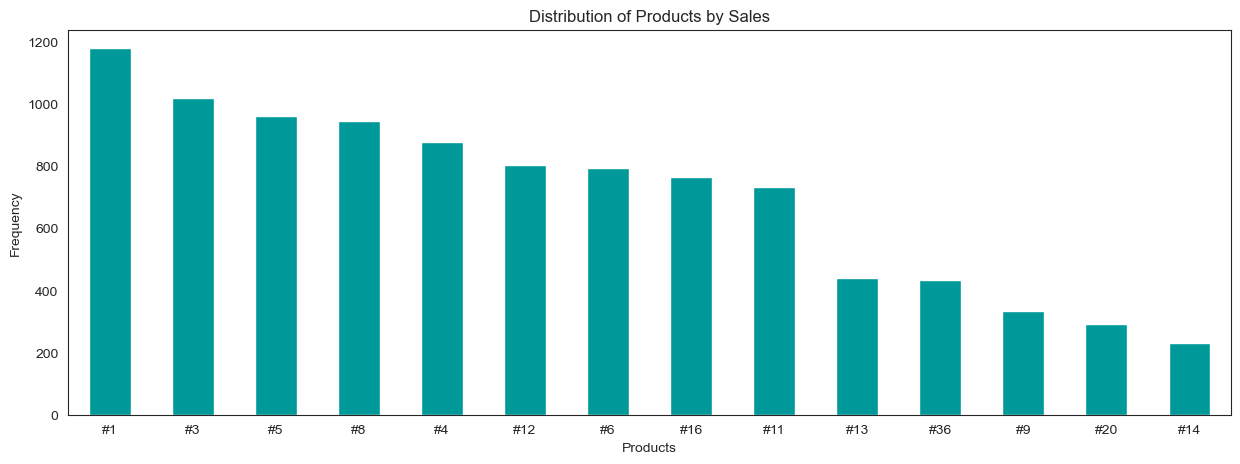

In [726]:
# Plot the distribution of the products by sales volume
plt.figure(figsize=(15, 5))
sales_data['Mapped_GCK'].value_counts().plot(kind='bar', color=siemens_green)
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.title('Distribution of Products by Sales')
plt.xticks(rotation=0)
plt.show()

* There are 14 different products in the dataset.
* The product with the highest frequency is product #1, with 1179 occurences.

<a class="anchor" id="sub-section-1_5_2">

### 1.5.2. Sales Value
    
</a>

In [727]:
# Check total revenue per product
rev_product = sales_data.groupby('Mapped_GCK')['Sales_EUR'].sum()
rev_product

/var/folders/k2/b8h9qb2964lgbzj3dxd5r80c0000gn/T/ipykernel_1061/3777591905.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_product = sales_data.groupby('Mapped_GCK')['Sales_EUR'].sum()


Mapped_GCK
#1    1544205996.7600
#11     65901314.6500
#12      8279486.3200
#13      1009156.9100
#14       493822.0600
#16     18391175.7100
#20        78326.8600
#3     533443487.7000
#36       998613.9100
#4      15627204.9600
#5     429595158.0100
#6      20641890.4900
#8      34871219.8200
#9        308446.5100
Name: Sales_EUR, dtype: float64

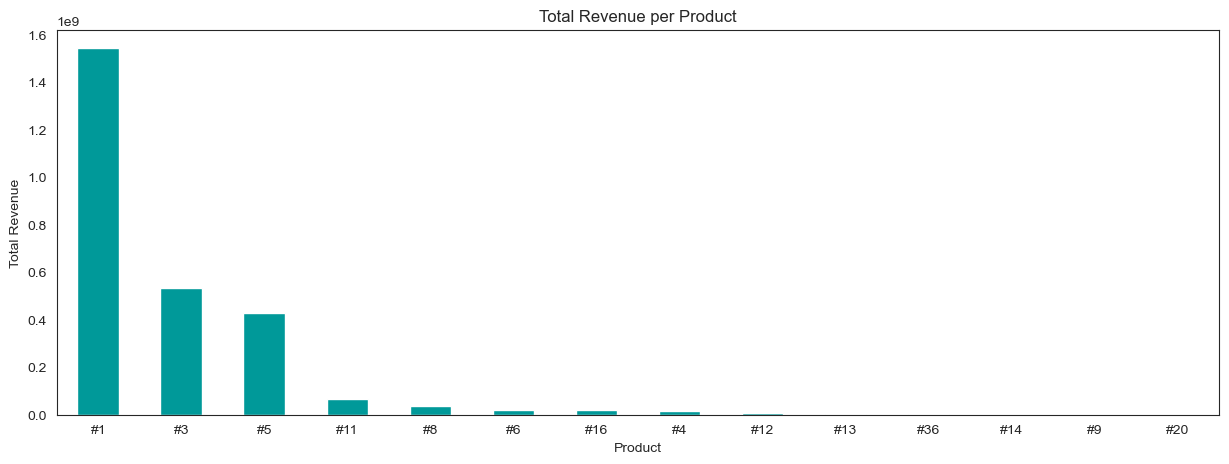

In [728]:
# Make a bar plot of total revenue per product
plt.figure(figsize=(15, 5))
rev_product.sort_values(ascending=False).plot(kind='bar', color=siemens_green)
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Product')
plt.xticks(rotation=0)
plt.show()

In [729]:
# Verify what is the percetange of the total revenue generated by the top 3 products
top3_revenue = rev_product.sort_values(ascending=False).head(3).sum()
total_revenue = sales_data['Sales_EUR'].sum()
top3_revenue_percent = (top3_revenue / total_revenue) * 100
print(f'The total revenue is {total_revenue:.2f} EUR.')
print(f'The top 3 products account for {top3_revenue_percent:.2f}% of the total revenue.')

The total revenue is 2673845300.67 EUR.
The top 3 products account for 93.77% of the total revenue.


<a class="anchor" id="sub-section-1_5_3">

### 1.5.3. Seasonality
    
</a>

<a class="anchor" id="sub-section-1_5_3_1">

#### 1.5.3.1. Sales
    
</a>

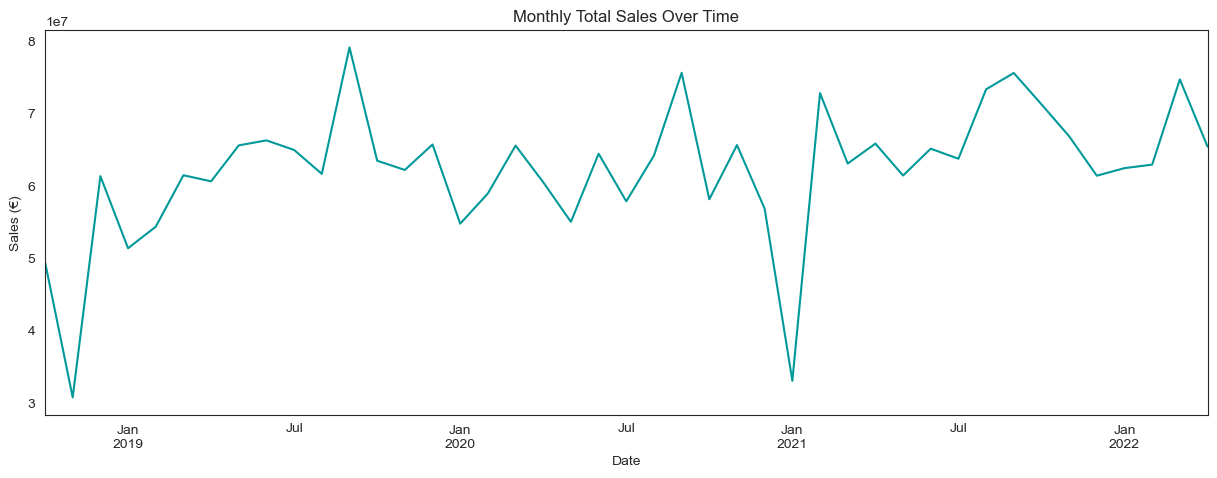

In [730]:
# Set index to date for graphs
monthly_sales = sales_data.set_index('DATE').resample('ME')['Sales_EUR'].sum()

monthly_sales.plot(figsize=(15,5), color=siemens_green)
plt.title('Monthly Total Sales Over Time')
plt.ylabel('Sales (€)')
plt.xlabel('Date')
plt.show()

* No consistent upward or downward trend across the full period.
* Cyclical or seasonal fluctuations, with sales repeatedly rising and falling.
* Sharp dips in late 2018 and early 2021.

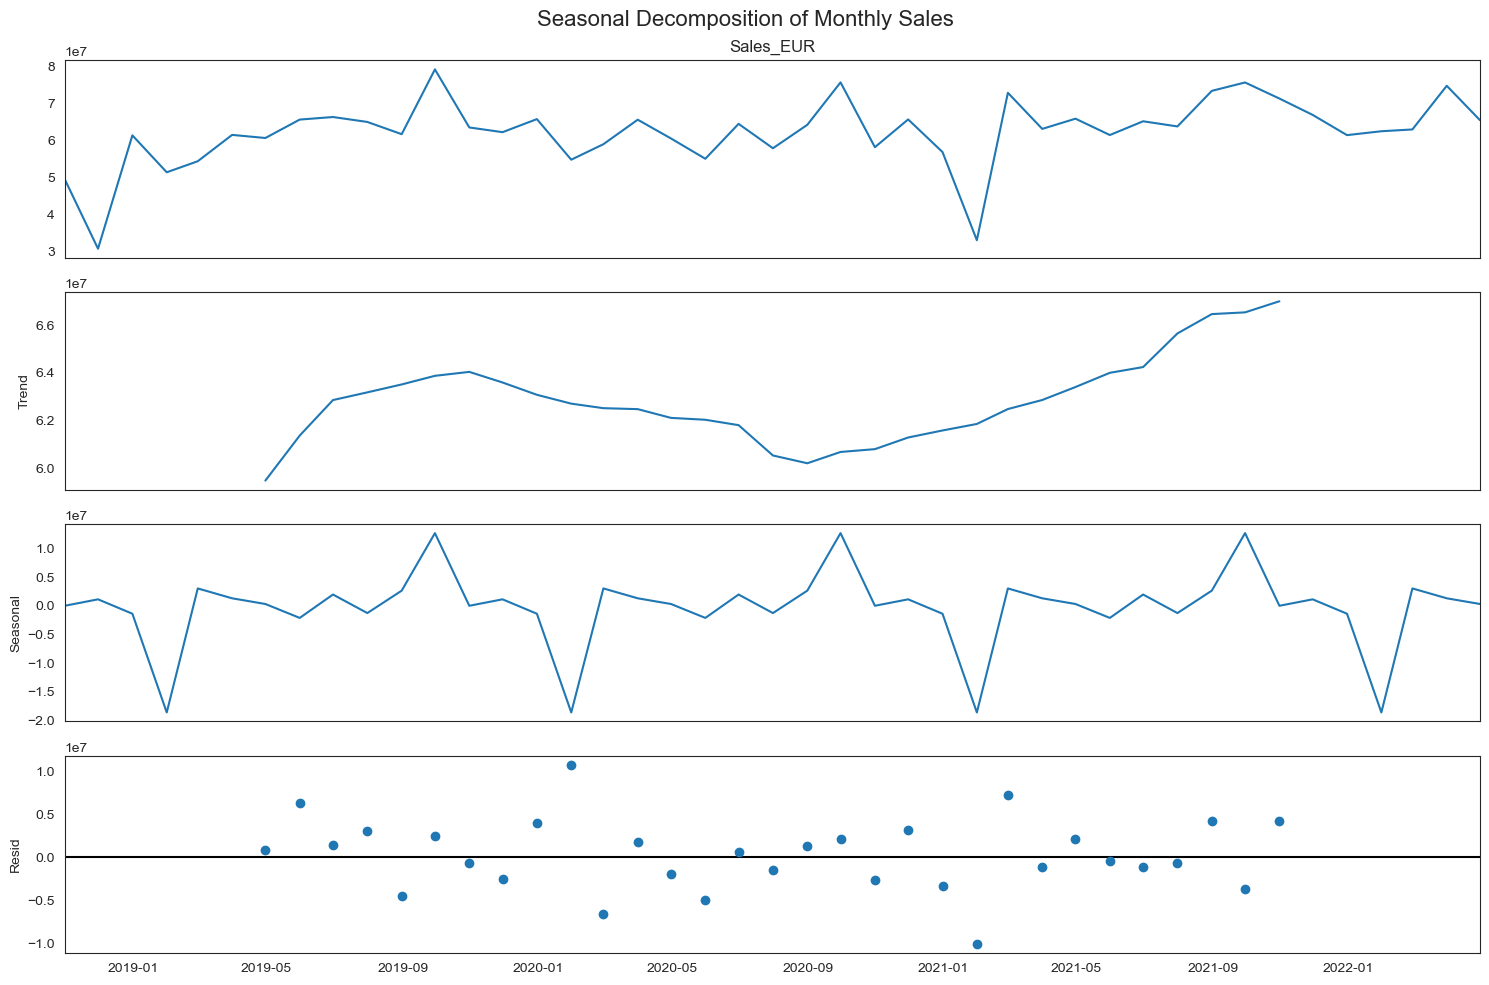

In [731]:
# Set DATE as index to use resample
monthly_sales = sales_data.set_index('DATE')

# Now resample by month-end
monthly_sales = monthly_sales['Sales_EUR'].resample('ME').sum()

decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()


Trend: long-term direction of sales, smoothed out.
* A gradual upward trend from 2018 to 2019.
* A slight dip in early 2020 - Covid-19?
* A recovery and stronger trend in 2021 and early 2022.

Seasonal: isolates recurring monthly effects that repeat every year.
* January-February have sales drop, while July-September have sales boost

Resid: noise or what's left over after removing trend + seasonality.

<a class="anchor" id="sub-section-1_5_3_2">

#### 1.5.3.2. Sales Revenue by Product
    
</a>

In [732]:
# Set DATE as datetime index
monthly_sales = sales_data.set_index('DATE')

# Resample to month-end and sum Sales_EUR per product category
monthly_sales = (monthly_sales.groupby('Mapped_GCK', observed=False)['Sales_EUR'].resample('ME').sum().unstack(level=0).fillna(0))

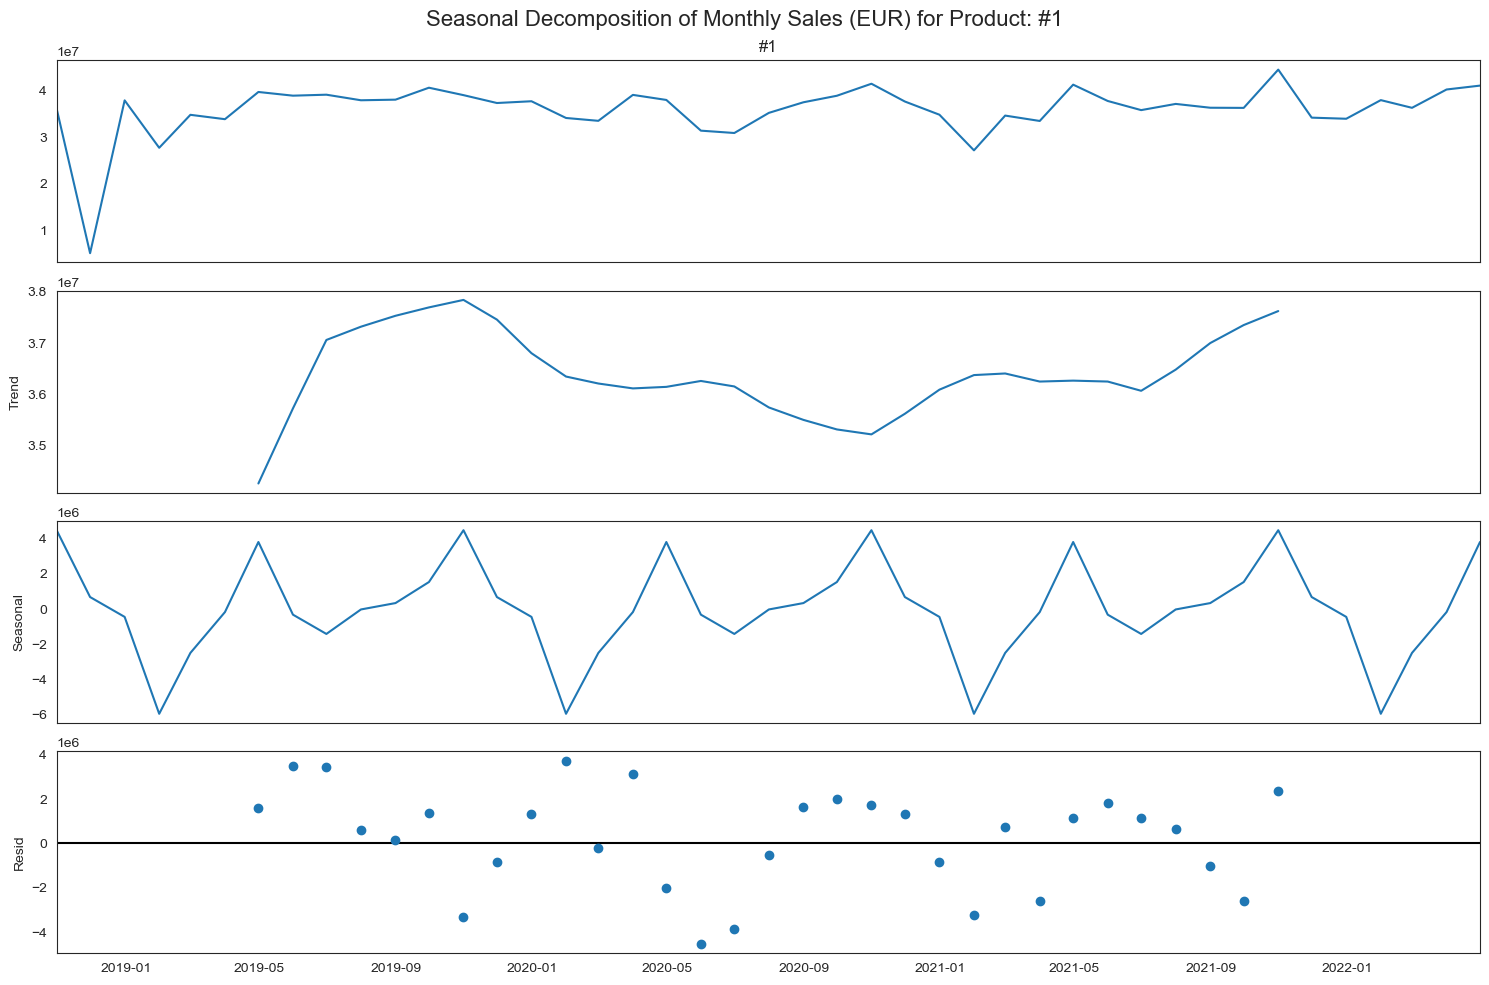

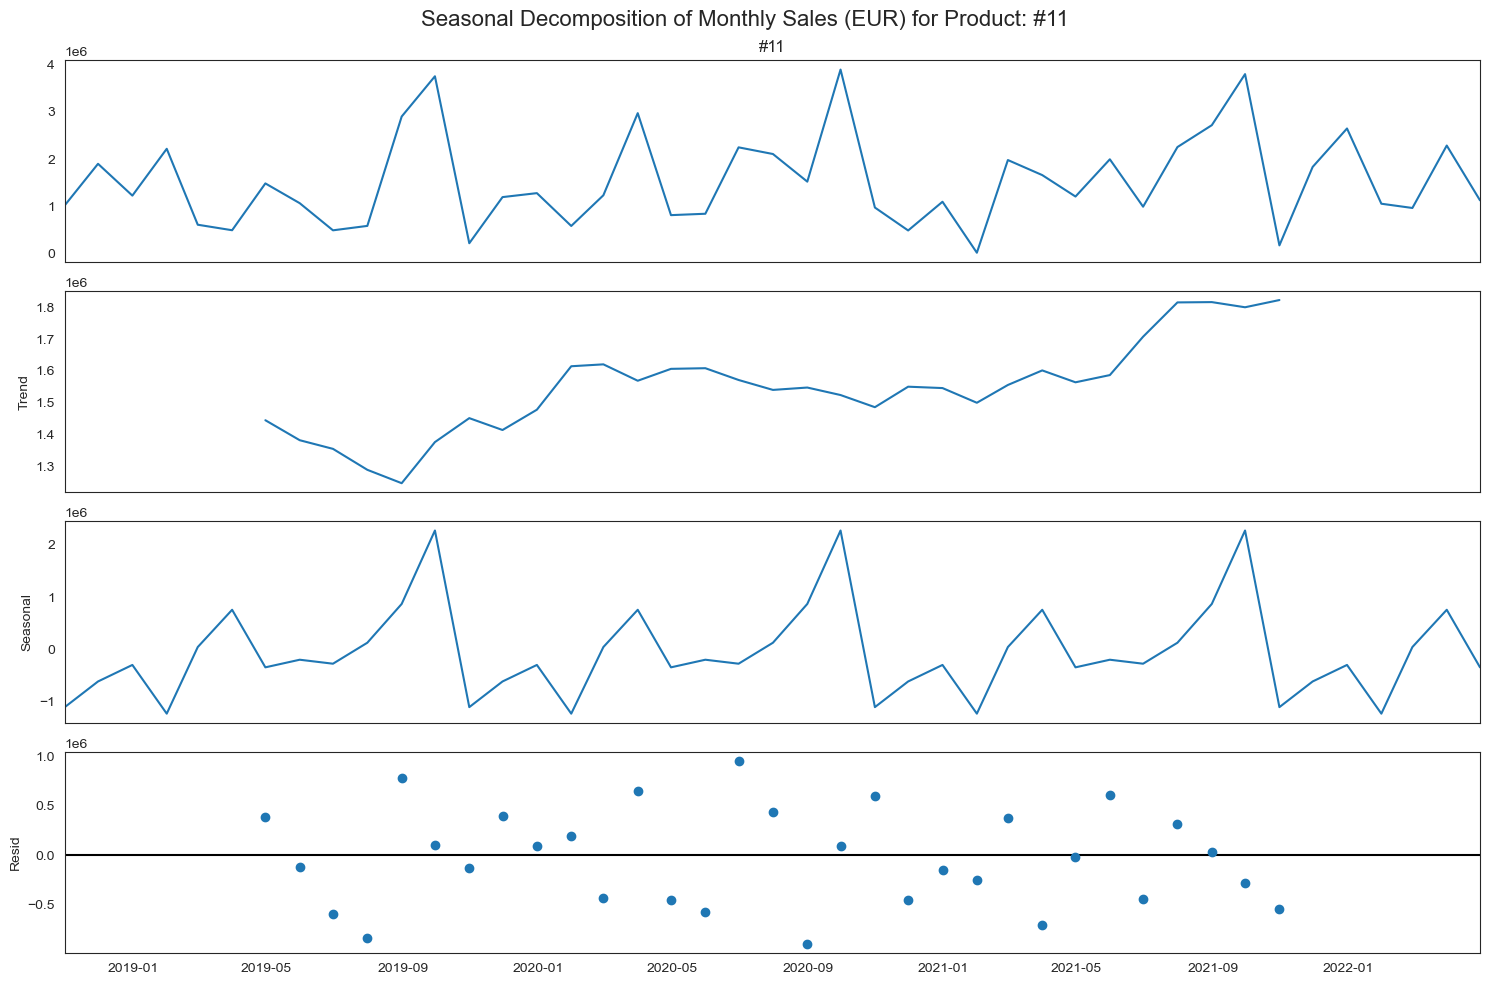

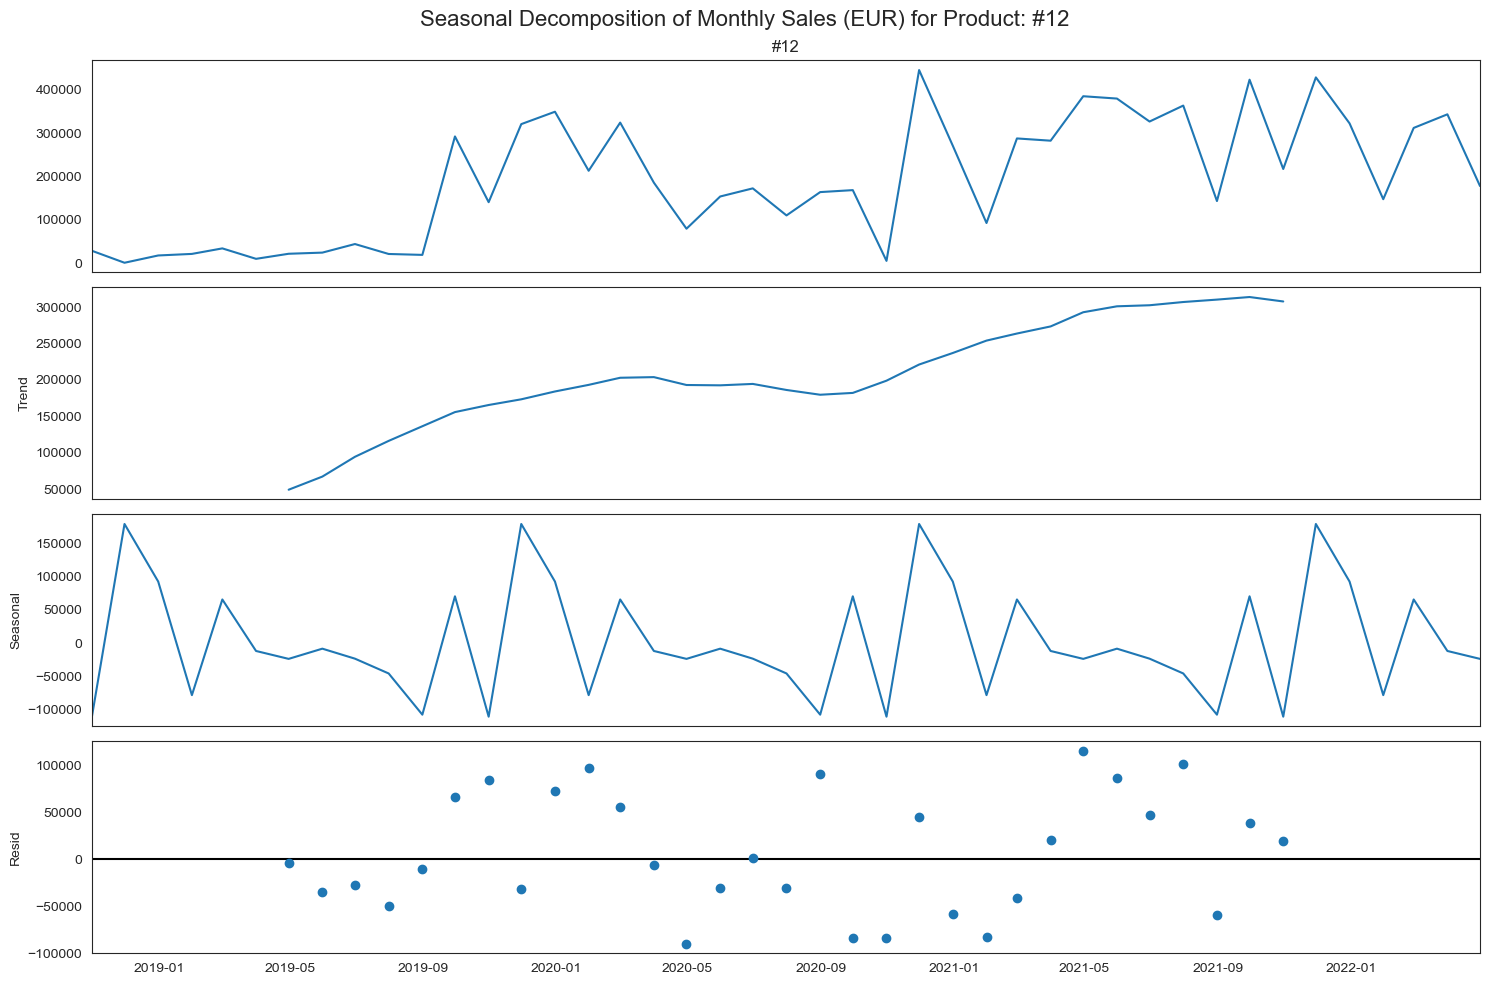

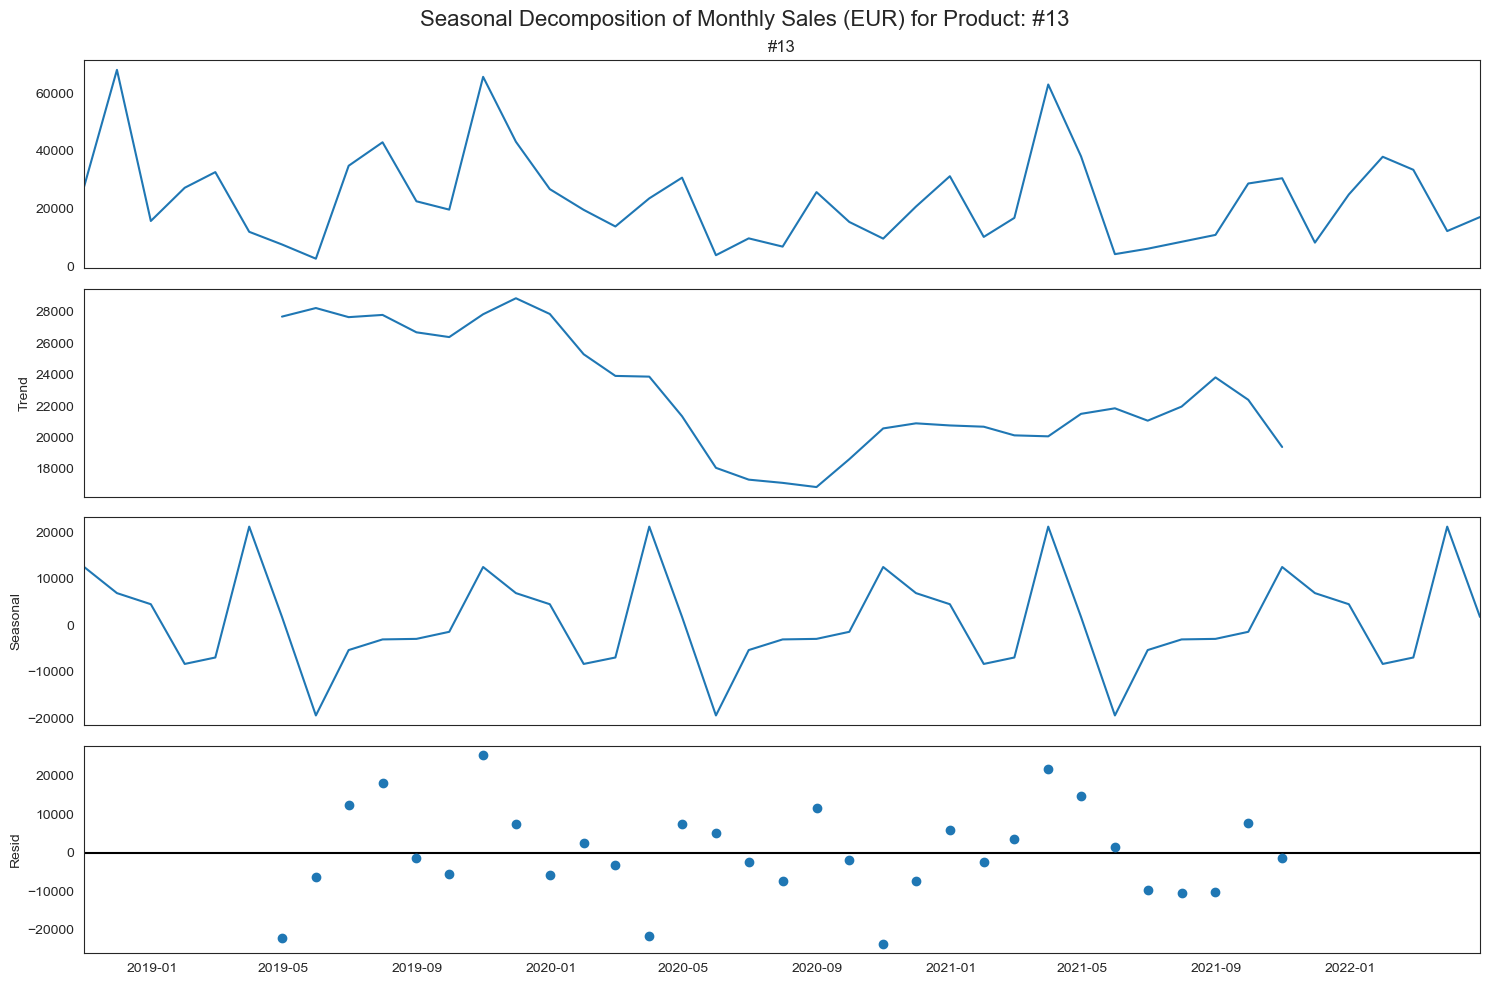

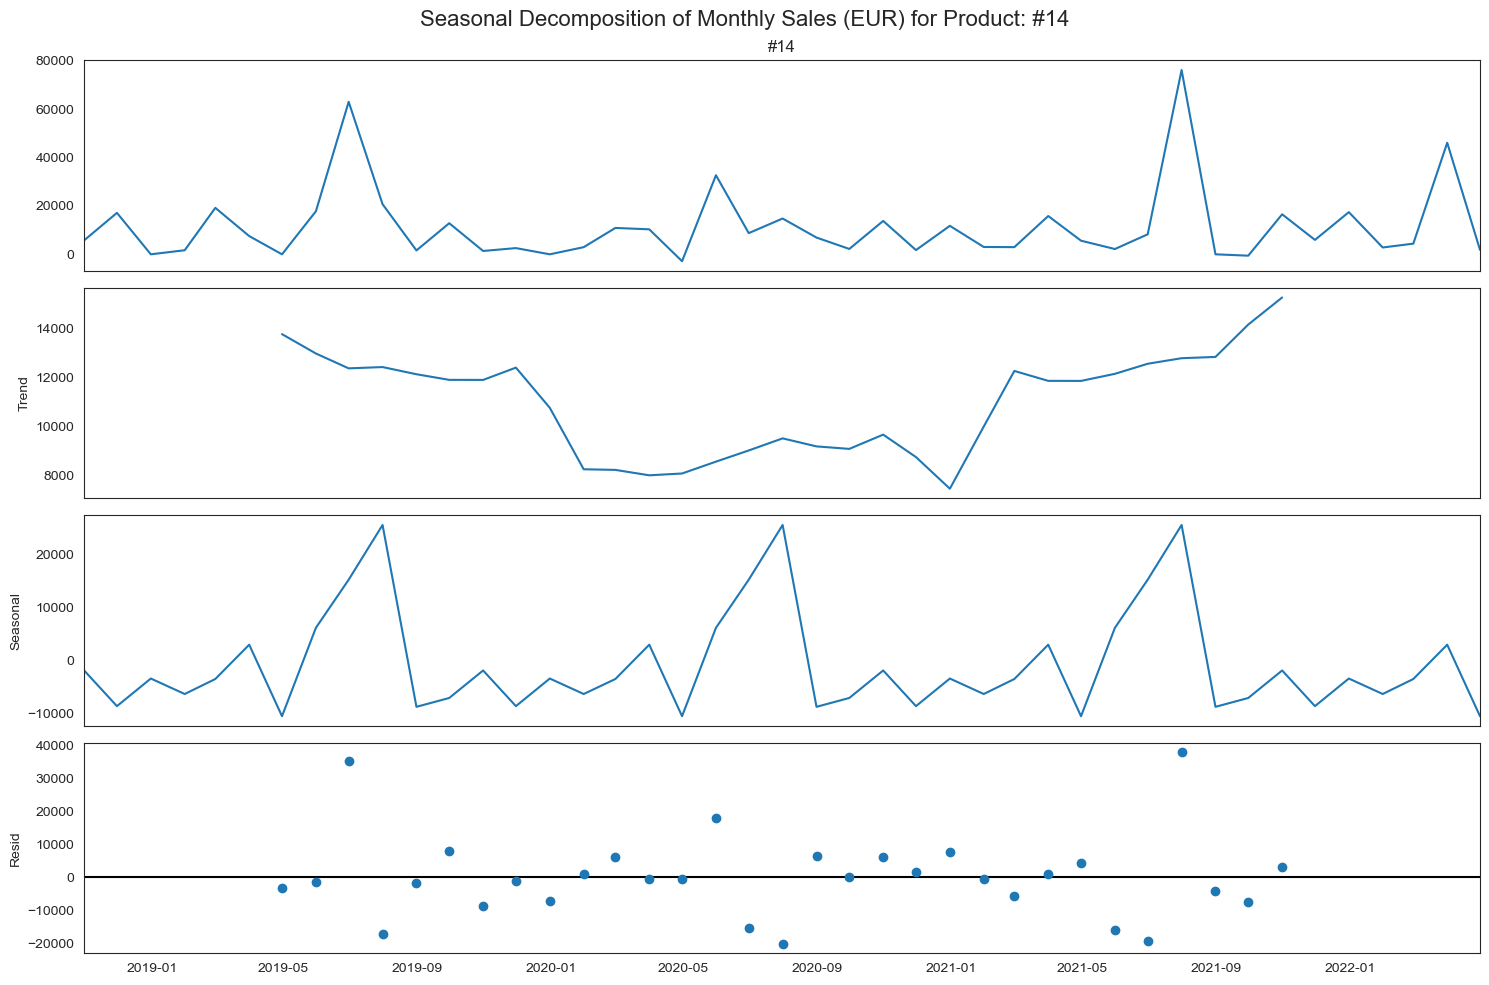

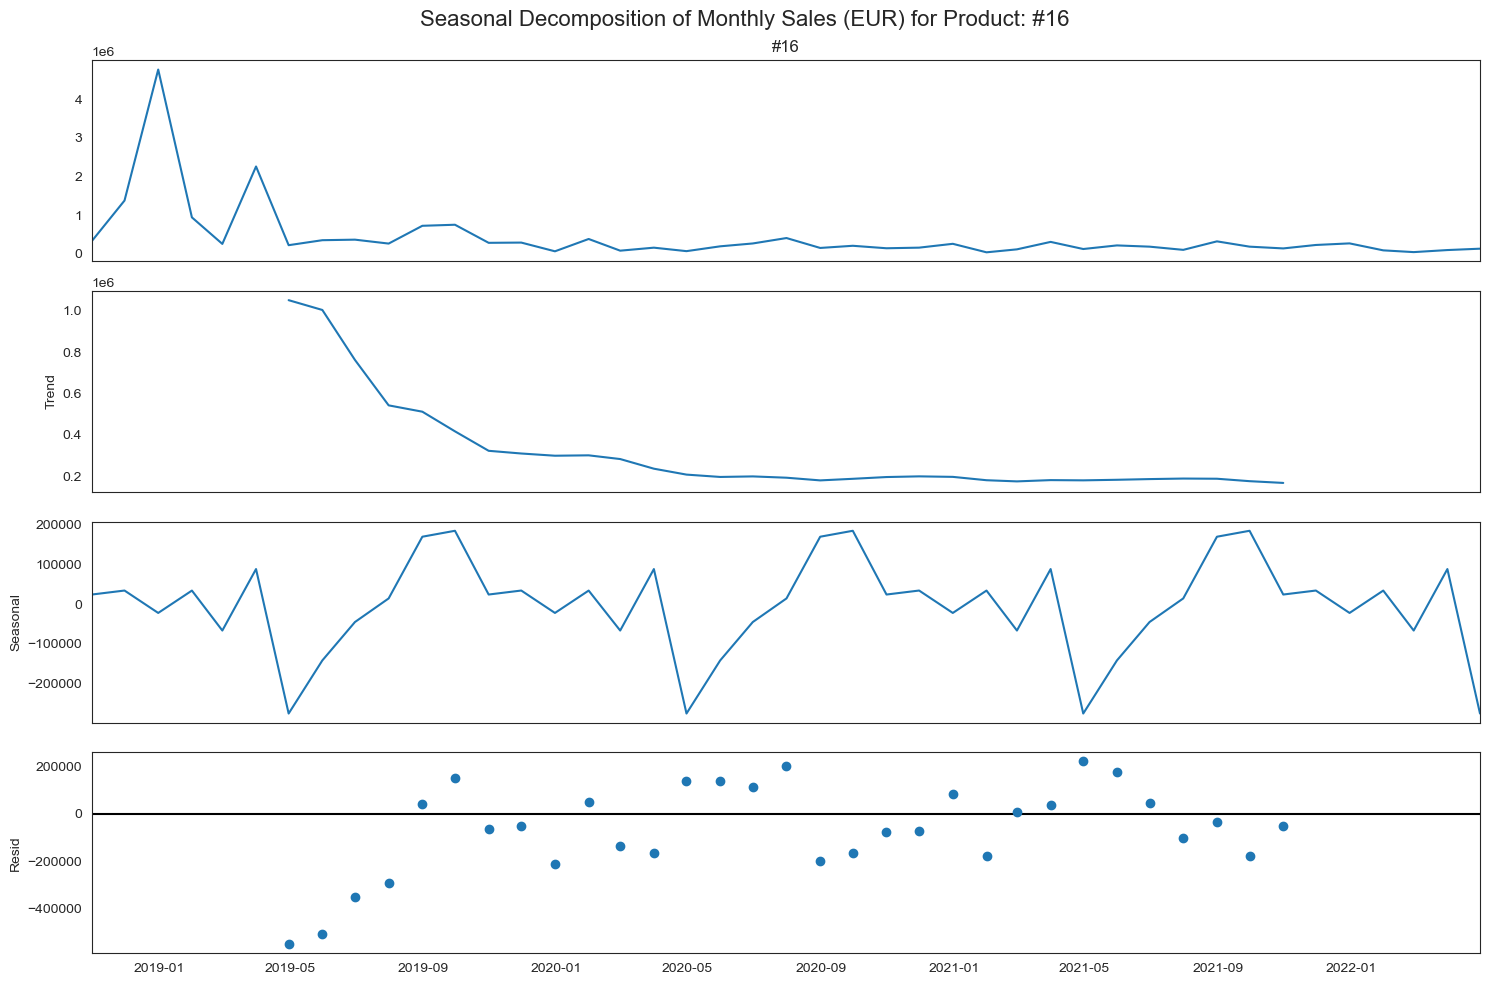

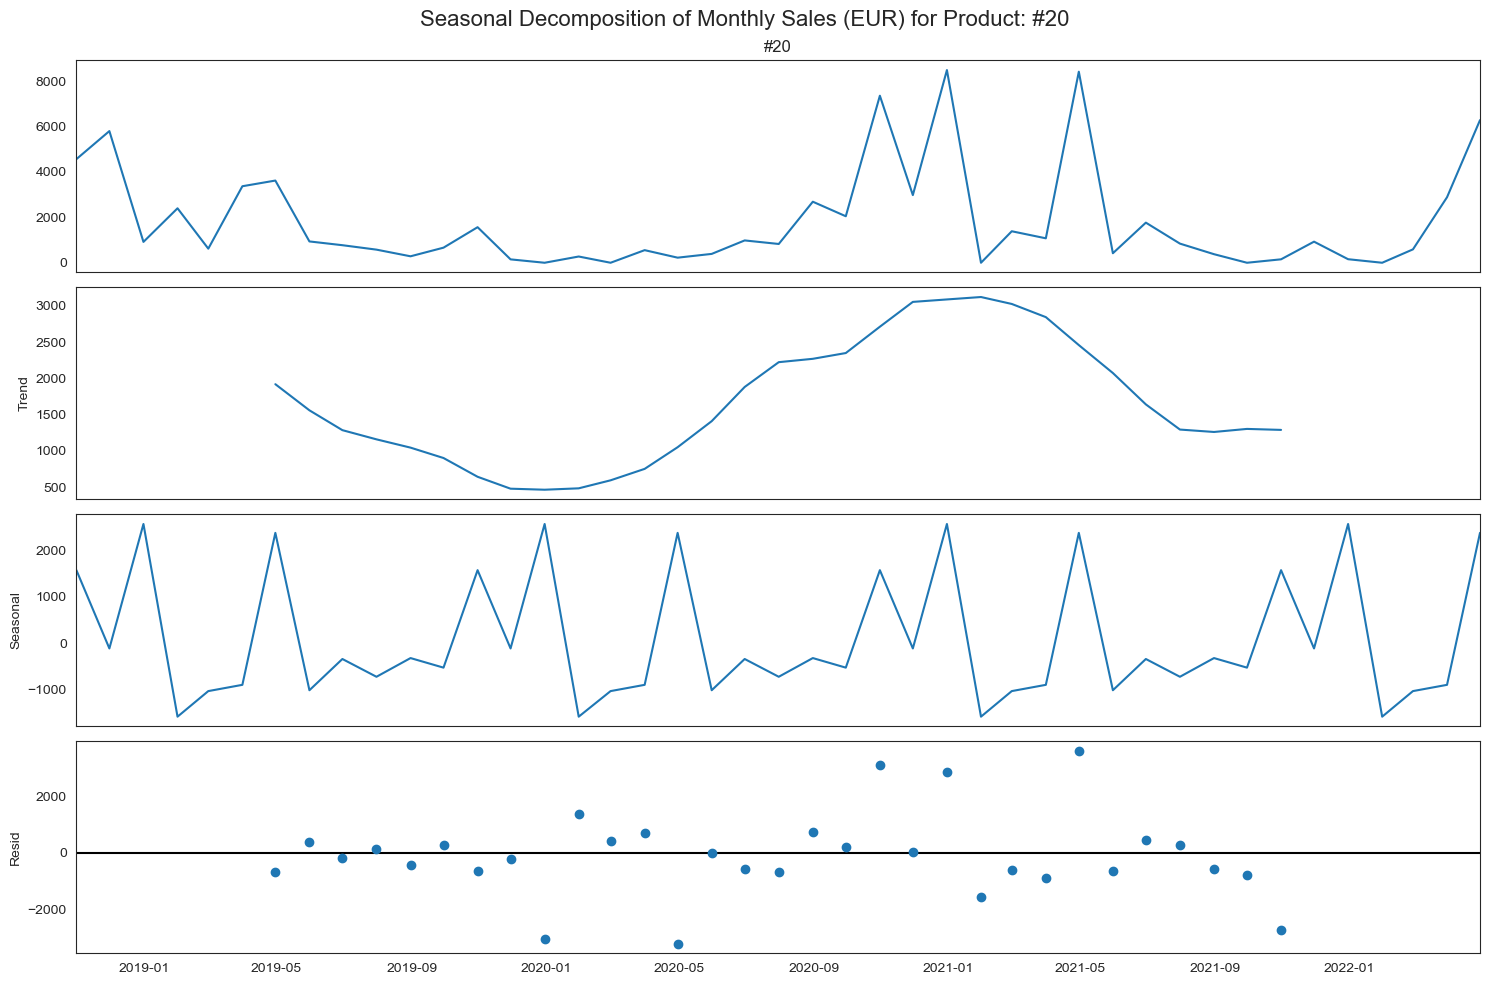

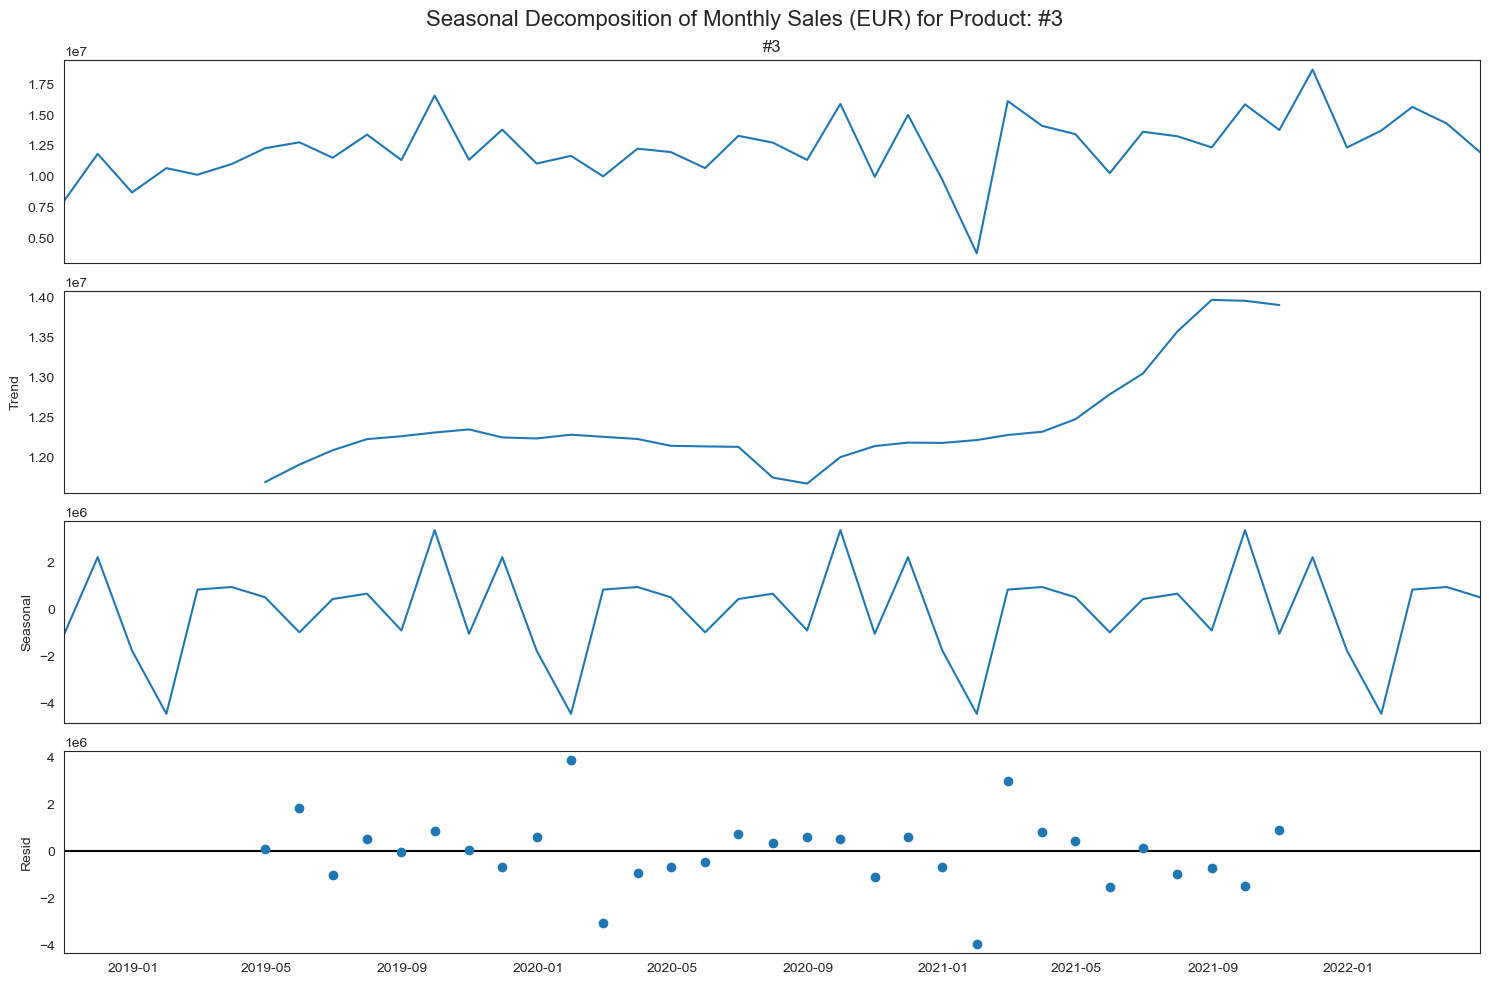

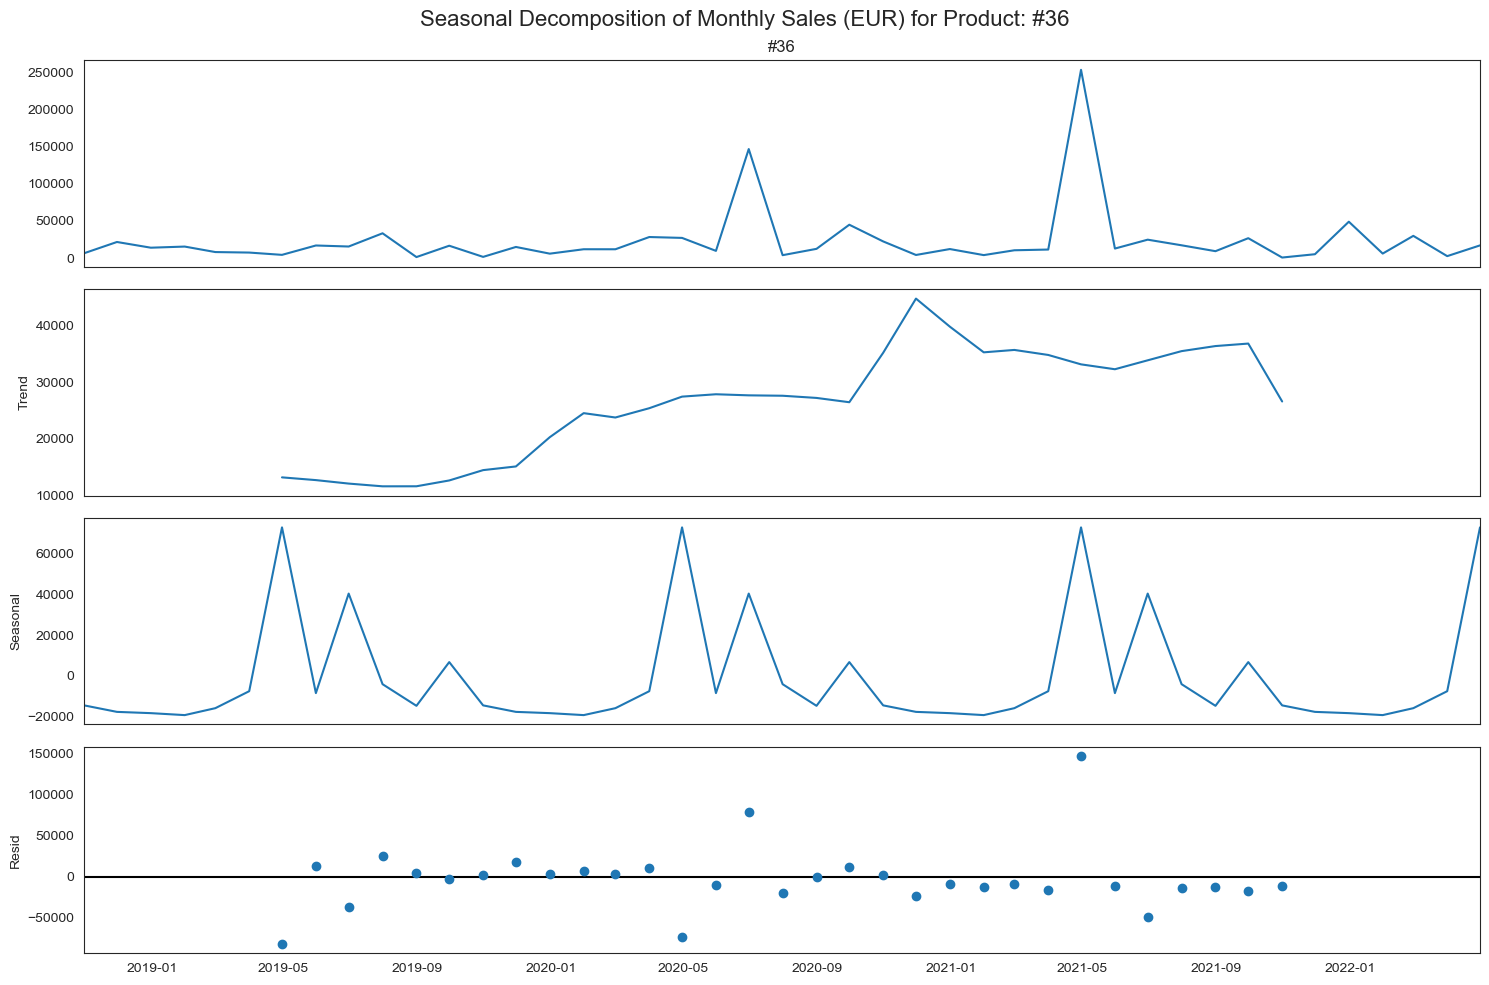

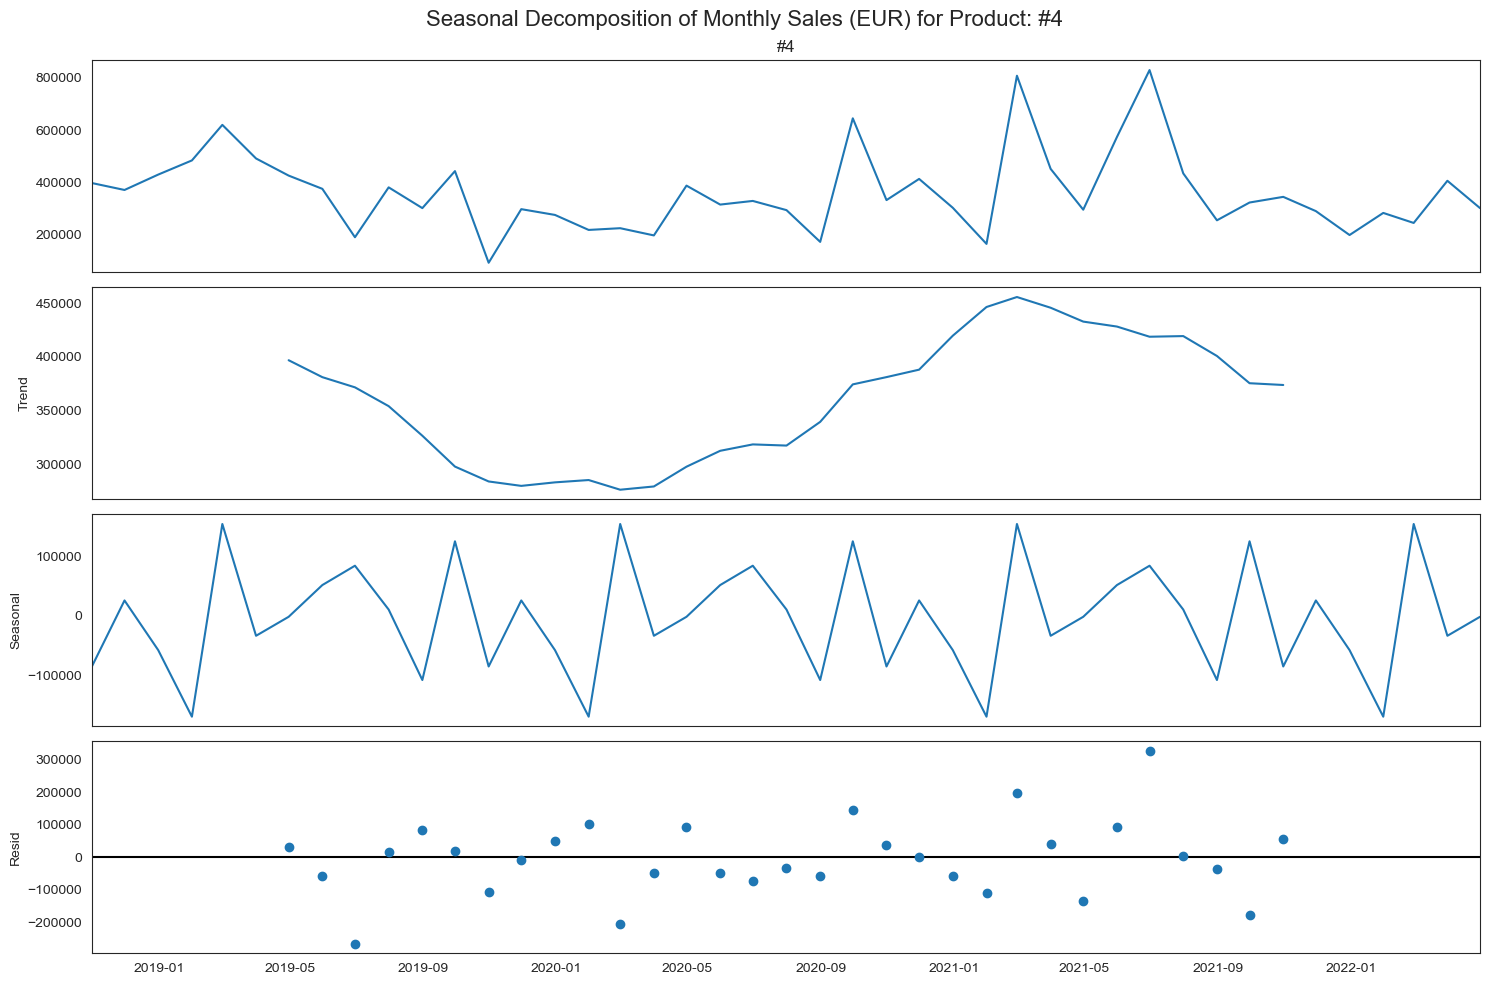

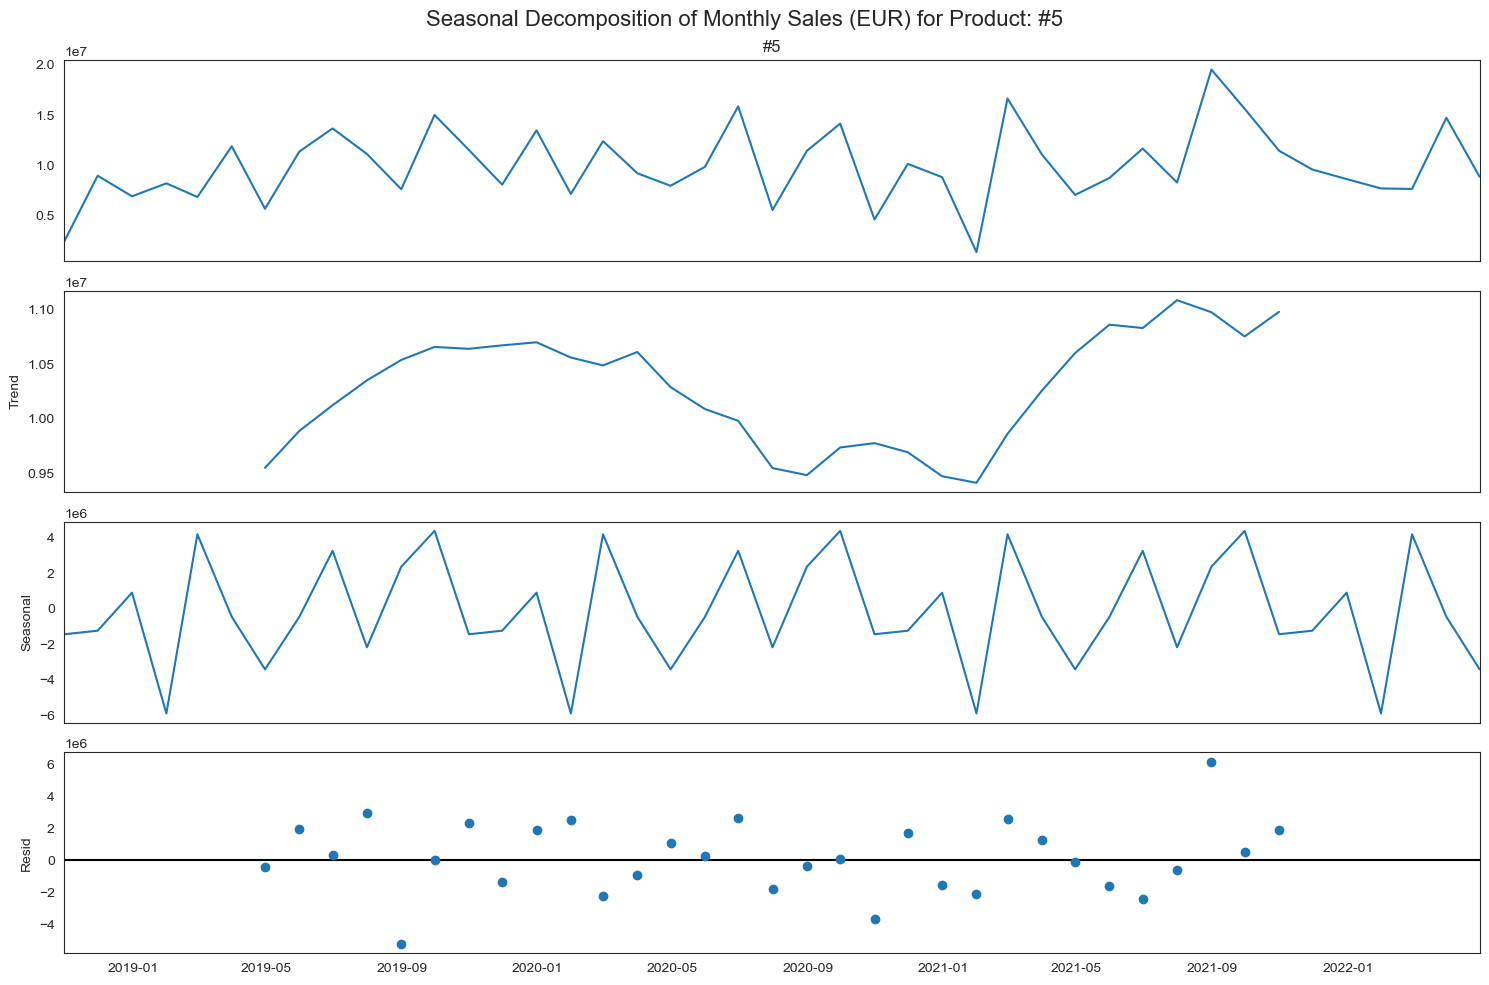

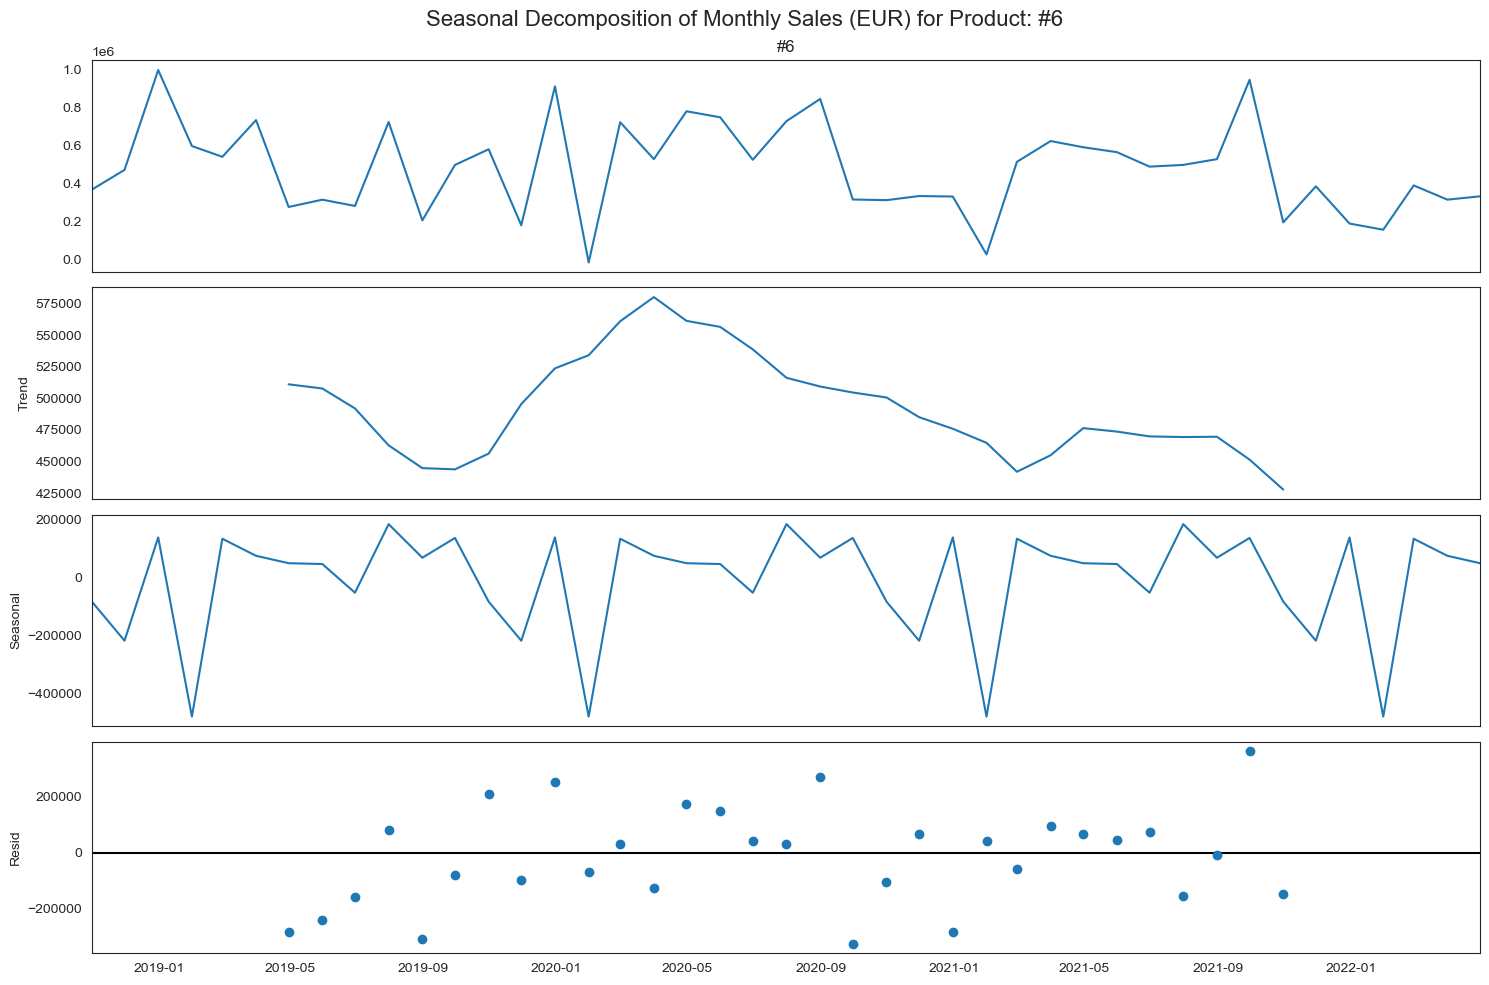

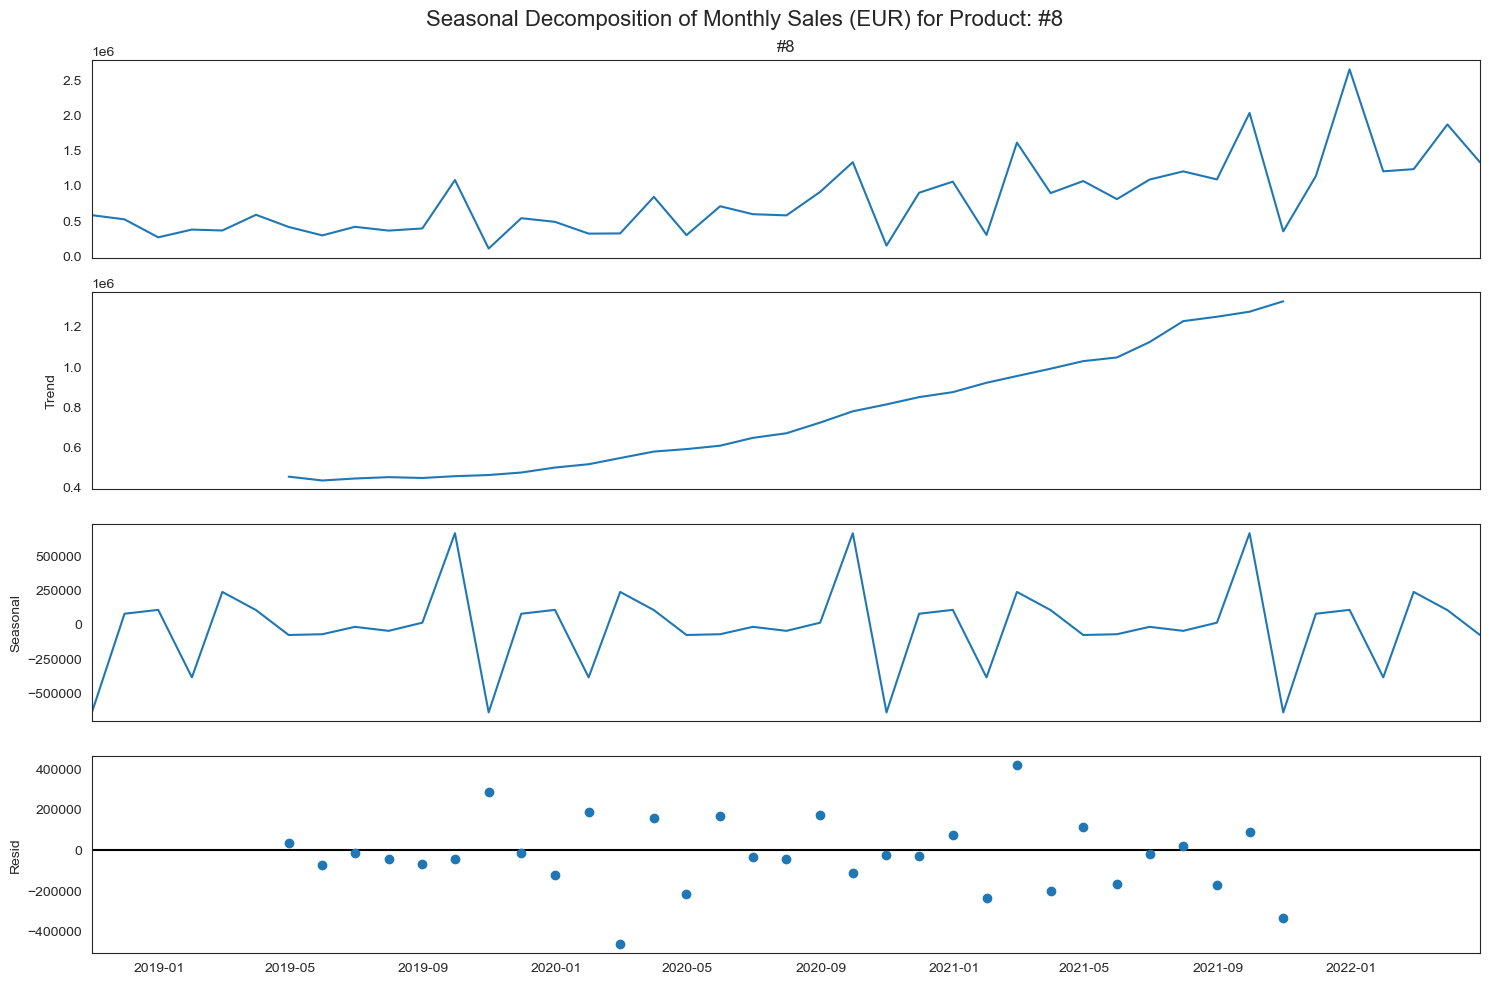

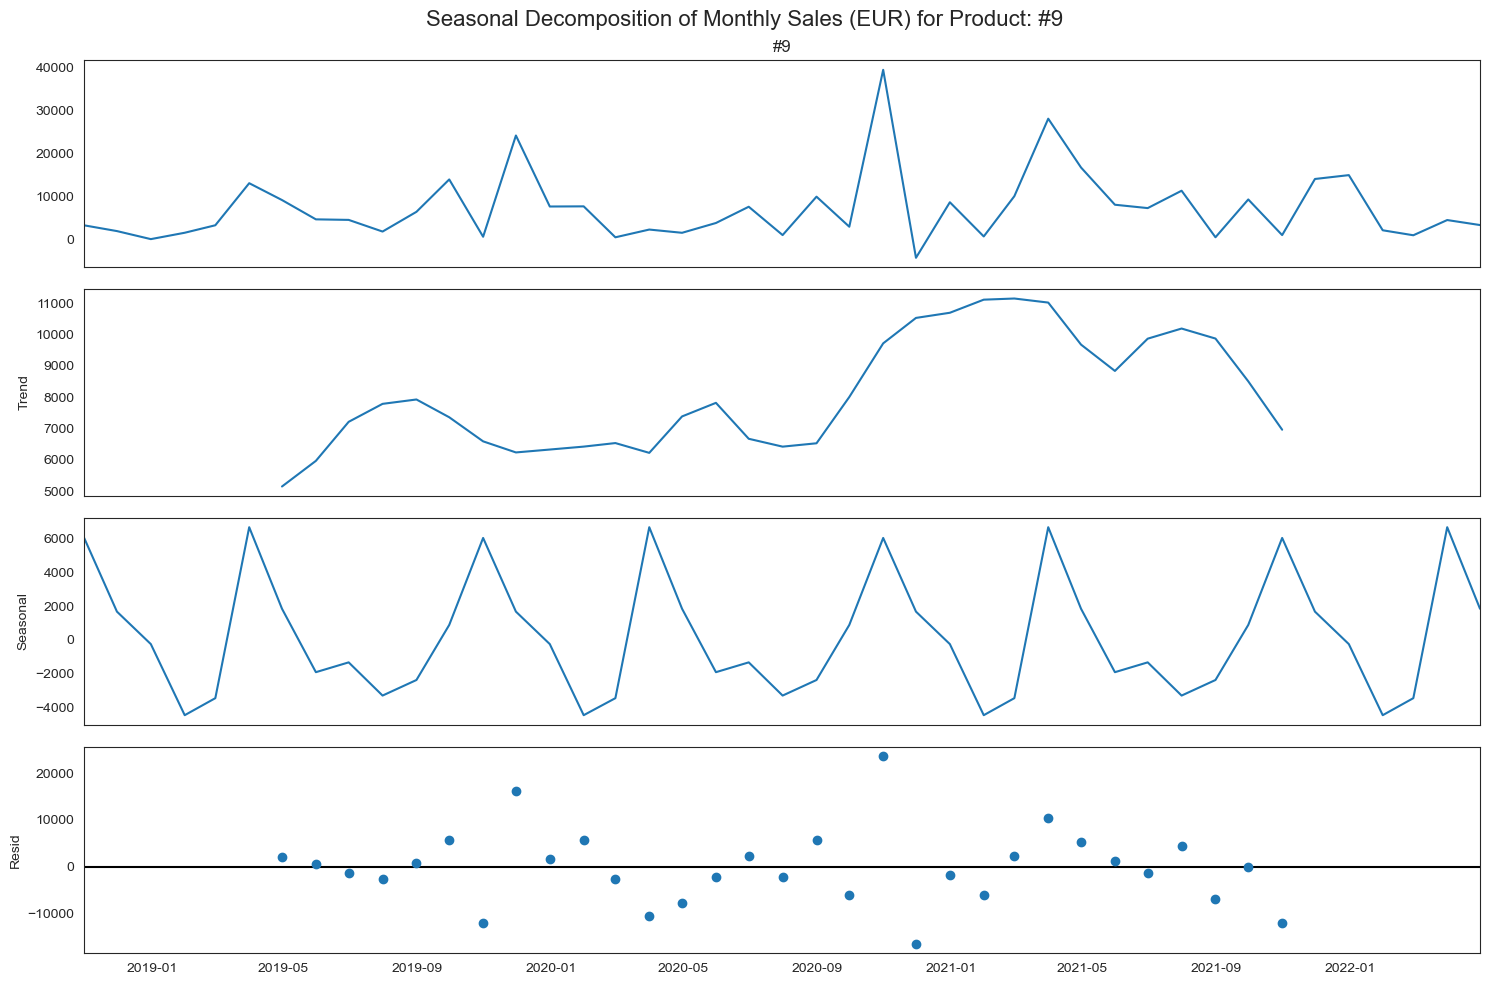

In [733]:
for product_category in monthly_sales.columns:
    sales_series = monthly_sales[product_category]

    decomposition = seasonal_decompose(sales_series, model='additive', period=12)

    # Plot
    fig = decomposition.plot()
    fig.set_size_inches(15, 10)
    plt.suptitle(f'Seasonal Decomposition of Monthly Sales (EUR) for Product: {product_category}', fontsize=16)
    plt.tight_layout()
    plt.show()

| Product | Observed                        | Trend                                             | Seasonality                                       | Residuals                                           |
|---------|----------------------------------|---------------------------------------------------|--------------------------------------------------|-----------------------------------------------------|
| #1      | ~30M to ~40M EUR/month           | Slight upward trend post-mid 2021                 | Regular seasonal pattern ~±4M EUR                | Randomly scattered; moderate variance               |
| #11     | ~0.5M to ~3.8M EUR/month         | Rising trend from 2020 to 2021, then stable       | Strong seasonality (up to ±2M EUR)               | Low variance, some clustering around mid-2020       |
| #12     | ~0 to ~420K EUR/month            | Clear and steady upward trend                     | Moderate seasonal fluctuations (~±100K EUR)      | Mostly tight spread, with mild upward outliers      |
| #13     | ~0 to ~65K EUR/month             | Rise till late 2020, followed by a decline *(major dip in 2020, likely due to COVID)* | Consistent seasonal spikes ~±20K EUR             | Noticeable fluctuations, few strong negative dips   |
| #14     | ~0 to ~75K EUR/month             | Some recovery after a dip in 2020                 | Large seasonal swings (~±20K EUR), less regular  | Some large residual outliers, erratic pattern       |
| #16     | ~0 to ~4.5M EUR/month            | Steep decline from 2019 peak                      | Weak but erratic seasonality (~±200K EUR)        | Moderate to high residual variance, downward bias   |
| #20     | ~0 to ~8K EUR/month              | U-shaped trend (decline, then rise, then decline) | Pronounced monthly fluctuations ±2K EUR          | Small but noticeable negative spikes                |
| #3      | ~1M to ~1.7M EUR/month           | Gradual upward trend in 2021                      | Noticeable monthly swings of ±2M EUR             | Large swings, scattered up to ±4M EUR               |
| #36     | ~0 to ~250K EUR/month            | Rising trend until mid-2021, then plateau         | Strong and erratic seasonality (~±60K EUR)       | Outliers in both directions, mostly small           |
| #4      | ~0.2M to ~0.8M EUR/month         | U-shaped trend with late 2020–2021 growth         | Clear and strong seasonality (~±100K EUR)        | Mostly scattered around zero, some peaks mid-2021   |
| #5      | ~0.5M to ~2M EUR/month           | Clear rise to mid-2020, dips slightly, then recovers | Strong seasonality (±4M EUR)                  | High variance, frequent large deviations            |
| #6      | ~0.2M to ~1M EUR/month           | Mild upward to 2020, then downward after          | Seasonal with larger swings (±200K to ±300K EUR) | Many large negative residuals, consistent spread    |
| #8      | ~0.3M to ~2.5M EUR/month         | Steady upward growth throughout                   | Moderate seasonality (~±0.5M EUR)                | Random residuals, slightly more negative outliers   |
| #9      | ~0 to ~40K EUR/month             | Inverted-U trend peaking around 2021              | Regular monthly fluctuations ±5K EUR             | Small residuals, symmetric and evenly distributed   |

In [734]:
# Create a copy to keep original data
sales_data_copy = sales_data.copy()

sales_data_copy['Year'] = sales_data_copy['date'].dt.year
sales_data_copy['Month'] = sales_data_copy['date'].dt.strftime('%b')

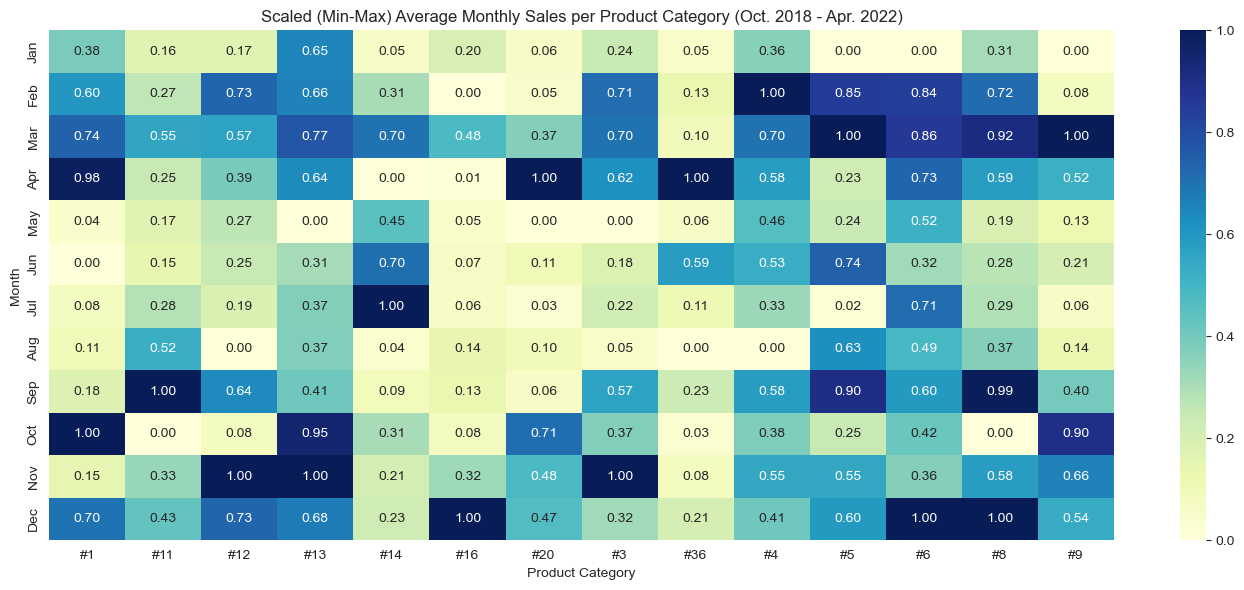

In [735]:
# Aggregate the number of sales per product (Mapped_GCK), per month and year
yearly_monthly_sales = sales_data_copy.groupby(['Year', 'Month', 'Mapped_GCK'], observed=False)['Sales_EUR'].sum().reset_index(name='Sales')

# Average over years, and group by Month and Product
avg_monthly_sales = yearly_monthly_sales.groupby(['Month', 'Mapped_GCK'], observed=False)['Sales'].mean().unstack().fillna(0)

avg_monthly_sales = avg_monthly_sales.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Scale the data for comparison and have a better understanding of seasonality 
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(avg_monthly_sales), index=avg_monthly_sales.index, columns=avg_monthly_sales.columns)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(scaled_data, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Scaled (Min-Max) Average Monthly Sales per Product Category (Oct. 2018 - Apr. 2022)')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

March appears to be a busy month across many products (esp. #1, #3, #5, #12, #13), except for product #36. October to December also shows stronger performance across multiple products — potentially due to holidays, year-end campaigns, or Q4 push. Summer months (June–August) and start of the year (January) are generally quieter across most products — possible vacation or off-season impact.

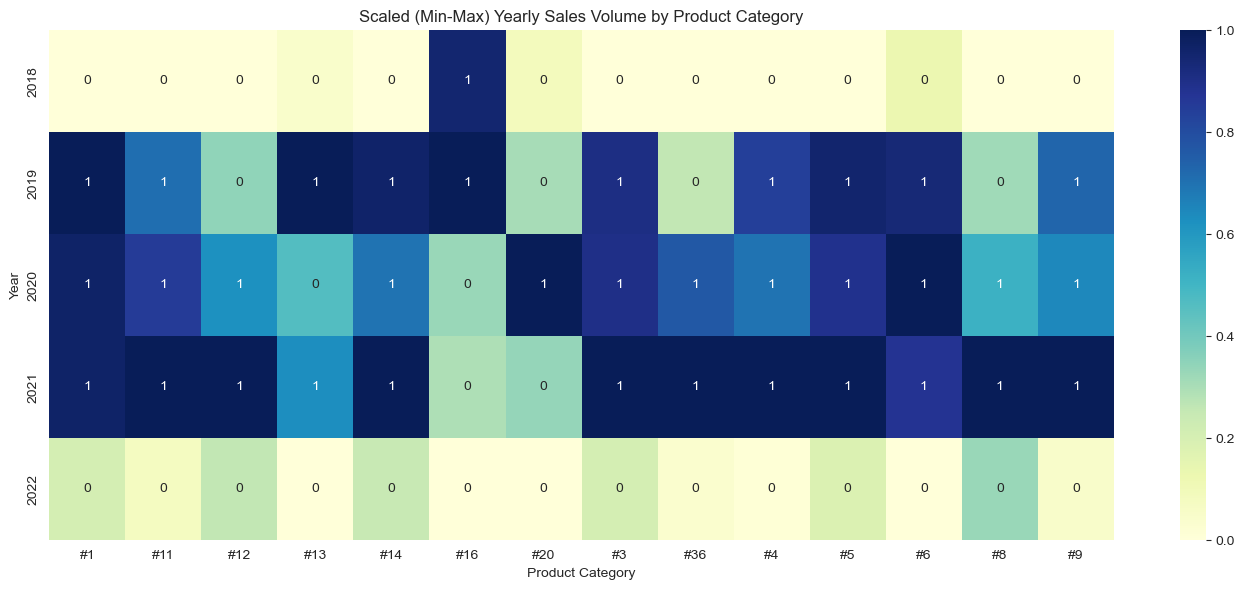

In [736]:
# Group by year and product, count transactions (volume)
yearly_volume = sales_data_copy.groupby(['Year', 'Mapped_GCK'], observed=False)['Sales_EUR'].sum().unstack().fillna(0)

# Scale the data for comparison
scaled_data = pd.DataFrame(scaler.fit_transform(yearly_volume), index=yearly_volume.index, columns=yearly_volume.columns)

plt.figure(figsize=(14, 6))
sns.heatmap(scaled_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Scaled (Min-Max) Yearly Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

* Only have 10 months in 2018 and 4 months in 2022!!
* 2021 is the most consistent peak year.
* Products like #16 show a clear multi-year decline, while #6, #3, #11, #1 remain steady.

<a class="anchor" id="sub-section-1_5_3_3">

#### 1.5.3.3. Top 3 Products
    
</a>

In [737]:
# Top 3 product categories by total revenue
rev_product = sales_data.groupby('Mapped_GCK', observed=False)['Sales_EUR'].sum()
top3_categories = rev_product.sort_values(ascending=False).head(3).index.tolist()

# Filter dataset to top 3 categories
top3_data = sales_data[sales_data['Mapped_GCK'].isin(top3_categories)]
# Set 'date' as the index for resampling
top3_data = top3_data.set_index('DATE')

# Resample by month and group by category for revenue and volume
monthly_revenue = (top3_data.groupby('Mapped_GCK', observed=False)['Sales_EUR'].resample('ME').sum().unstack(level=0).fillna(0))
monthly_volume = (top3_data.groupby('Mapped_GCK', observed=False)['Sales_EUR'].resample('ME').count().unstack(level=0).fillna(0))

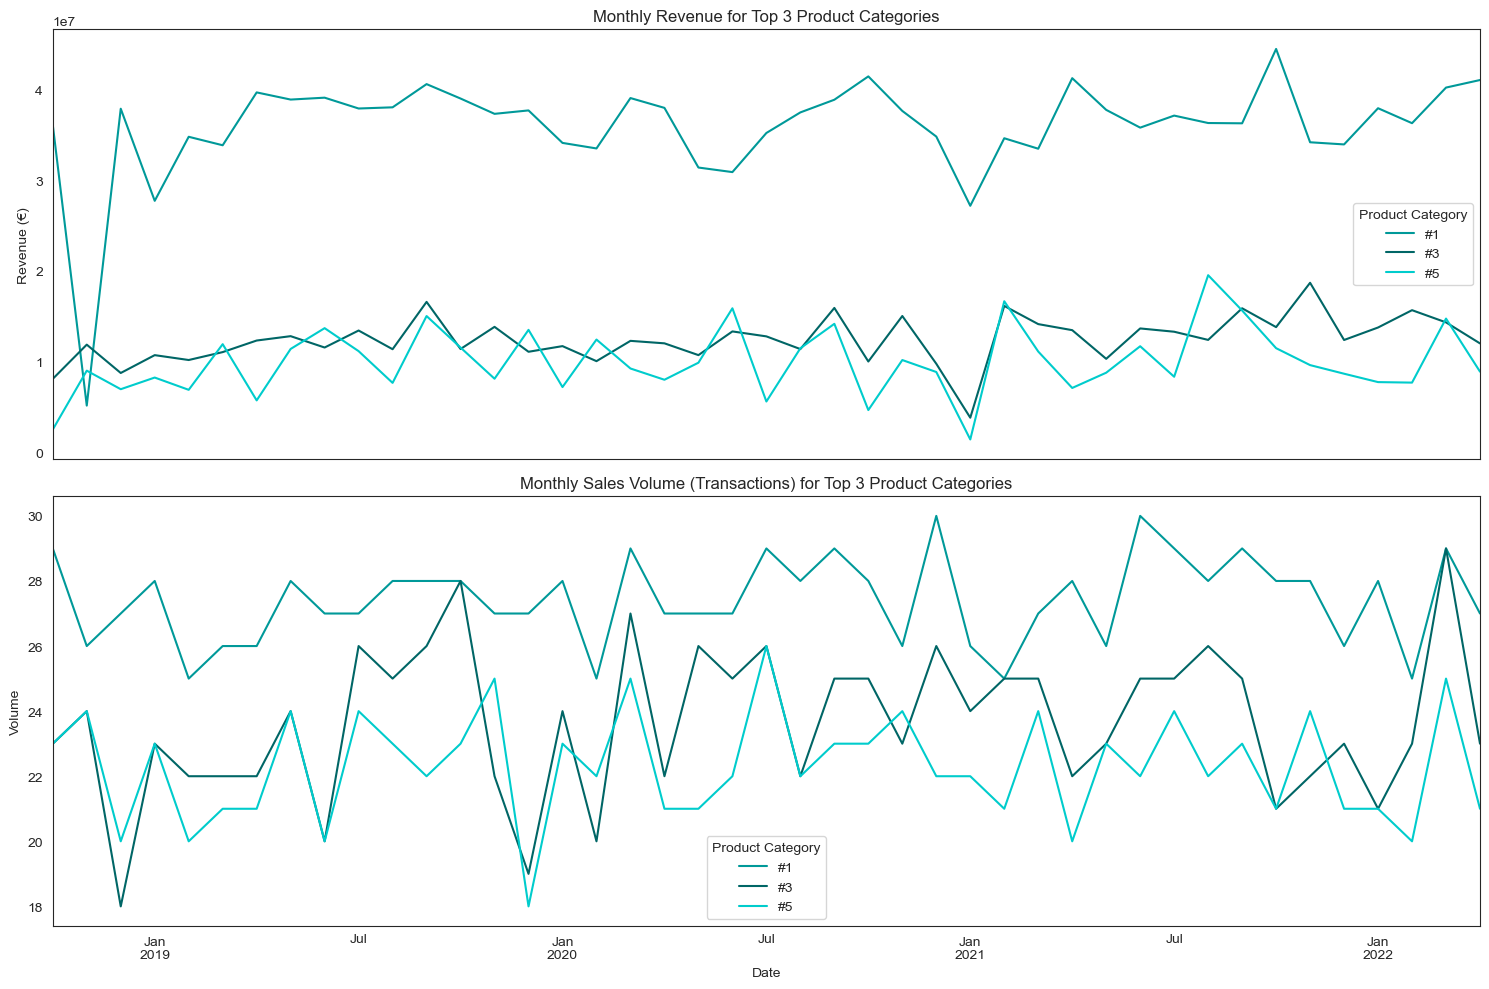

In [738]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Sales plot
monthly_revenue.plot(ax=axs[0], color=siemens_colors)
axs[0].set_title('Monthly Revenue for Top 3 Product Categories')
axs[0].set_ylabel('Revenue (€)')
axs[0].legend(title='Product Category')

# Volume plot
monthly_volume.plot(ax=axs[1], color=siemens_colors)
axs[1].set_title('Monthly Sales Volume (Transactions) for Top 3 Product Categories')
axs[1].set_ylabel('Volume')
axs[1].set_xlabel('Date')
axs[1].legend(title='Product Category')

plt.tight_layout()
plt.show()

- Category #1 is a clear revenue driver. It dominates earnings but not transaction count, implying higher unit prices or larger order sizes.
- Categories #3 and #5 are volume-driven. Their volume is similar to #1, but revenue is lower. This could be lower-priced items.
- There is mismatch between revenue and volume. Use price per unit as a derived feature?
- Seasonality/Trend: there's some seasonality in revenue for Category #1. Volume seems more random — might benefit from smoothing or rolling stats.

<a class="anchor" id="sub-section-1_5_4">

### 1.5.4. Market Data
    
</a>

<a class="anchor" id="sub-section-1_5_4_1">

#### 1.5.4.1. Merging Datasets for Analysis
    
</a>

In [739]:
# group by product and month and sum sales
monthly_product_sales = sales_data.groupby(['Mapped_GCK', 'date'], observed=False)['Sales_EUR'].sum().unstack(level=0).fillna(0)
monthly_product_sales.columns = [f'Product_{col.strip("#")}' for col in monthly_product_sales.columns]
product_columns = [col for col in monthly_product_sales.columns if col.startswith('Product_')]

In [740]:
print(monthly_product_sales.index.dtype)
monthly_product_sales.head()

period[M]


Product_1   Product_11  Product_12  Product_13  Product_14  \
date                                                                     
2018-10 36098918.7900 1021303.5000  28686.3300  27666.1000   5770.0000   
2018-11  5140760.0000 1898844.8000   1070.0000  68180.0000  17130.0000   
2018-12 37889612.1200 1226122.0000  17880.6000  15655.1800      0.0000   
2019-01 27728148.3500 2216391.7400  21484.0000  27198.2900   1686.4000   
2019-02 34793163.5300  610456.6000  34214.7400  32638.6300  19196.3000   

          Product_16  Product_20     Product_3  Product_36   Product_4  \
date                                                                     
2018-10  333196.8700   4563.1400  8089465.9600   6474.6000 397760.6900   
2018-11 1377694.3200   5798.1400 11863001.5100  21617.6100 371322.4200   
2018-12 4762524.6600    918.6500  8736859.3900  13924.5200 430100.9600   
2019-01  942957.1900   2398.0400 10705300.6300  15444.3900 484173.8800   
2019-02  257765.0400    620.6600 10167796.8600   8051.1500 620031.8000   

           Product_5   Product_6   Product_8  Product_9  
date                                                     
2018-10 2499061.1900 369231.6000 586052.7400  3219.3200  
2018-11 8993944.0400 473046.9600 526292.7700  1875.9000  
2018-12 6947507.3100 999472.6900 271490.7100     0.0000  
2019-01 8233205.0700 598874.1000 381400.1500  1487.0000  
2019-02 6879250.9900 542037.5200 368475.5700  3234.2800

In [741]:
# Make sure 'date' is a column in monthly_product_volume
monthly_product_sales = monthly_product_sales.reset_index()

# Merge
merged_data = market_data.merge(monthly_product_sales, on='date', how='left')

In [742]:
merged_data.tail(5)

date  MAB_ELE_PRO156  MAB_ELE_SHP156  MAB_ELE_PRO250  MAB_ELE_SHP250  \
214  2021-12        310.7632        310.7632        100.5657        134.5895   
215  2022-01        235.9561        235.9561         85.7435        108.1563   
216  2022-02        235.9561        235.9561         90.6035        117.7158   
217  2022-03        329.4134        329.4134        107.8435        136.8587   
218  2022-04        267.3731        267.3731         87.6981        116.5287   

     MAB_ELE_PRO276  MAB_ELE_SHP276  MAB_ELE_PRO380  MAB_ELE_SHP380  \
214        118.1033        149.3643         94.0068        150.4827   
215         94.5506        120.3534         86.8510        101.2583   
216        103.9879        129.3837        106.5838        120.9565   
217        121.3081        151.2013        124.6380        153.6451   
218         99.5222        127.0229        103.5567        128.7333   

     MAB_ELE_PRO392  MAB_ELE_SHP392  MAB_ELE_PRO756  MAB_ELE_SHP756  \
214        127.7717        131.0297        106.7040        104.8192   
215        110.4602        110.8235        103.4993        101.7016   
216        117.8796        118.3002        100.2945         98.5840   
217        152.0006        156.4006         97.0897         95.4663   
218        114.2623        115.0120             NaN             NaN   

     MAB_ELE_PRO826  MAB_ELE_SHP826  MAB_ELE_PRO840  MAB_ELE_SHP840  \
214        101.2735             NaN        107.0408        148.5904   
215         95.0035             NaN        111.0521        129.5658   
216         98.4584             NaN        116.3363        138.5603   
217        121.9939             NaN        117.6540        165.9262   
218         95.2665             NaN        116.9610             NaN   

     MAB_ELE_PRO1100  MAB_ELE_SHP1100  RohiBASEMET1000_org  \
214         123.0767         150.0469             125.2070   
215         103.1998         120.3381             133.2194   
216         113.5006         131.5001             138.9056   
217         133.1330         158.0556             149.8909   
218         112.9022         134.9355             146.0910   

     RohiENERGY1000_org  RohiMETMIN1000_org  RohiNATGAS1000_org  \
214            112.3730            116.7152            236.4884   
215            121.3099            125.2296            196.9111   
216            131.2732            131.1765            197.5237   
217            163.1868            141.2833            271.0799   
218            153.1889            138.0941            243.4360   

     RohCRUDE_PETRO1000_org  RohCOPPER1000_org  WKLWEUR840_org  PRI27840_org  \
214                 92.1887           126.7612          1.1304      128.5113   
215                106.1731           129.8291          1.1314      131.6285   
216                118.3482           131.9636          1.1342      133.3422   
217                142.2009           135.7822          1.1019      136.1538   
218                130.8354           134.8597          1.0819      137.5316   

     PRI27826_org  PRI27380_org  PRI27250_org  PRI27276_org  PRI27156_org  \
214           NaN      113.3096      108.1825      115.7489       98.1062   
215           NaN      115.3906      111.0375      117.8534       98.2802   
216           NaN      116.4311      112.0571      118.9056       98.7142   
217           NaN      117.4716      112.3630      119.8527       99.0216   
218           NaN      118.4080      113.2807      121.2206       98.8571   

     PRO28840_org  PRO281000_org  PRO28756_org  PRO28826_org  PRO28380_org  \
214      105.7367       134.5988      102.2775       90.3501      103.1914   
215      110.8944       117.4899      100.3052       85.4442       92.2923   
216      117.1682       124.6278       98.3329       89.0214      113.2906   
217      118.9109       149.3752       96.3606      109.1559      134.2888   
218      119.3855       128.2857           NaN       84.7287      111.0907   

     PRO28392_org  PRO28250_org  PRO28276_org  PRO27840_o

For easier and more manageable analysis, we devide the features in market data as below.

In [743]:
production_features = ["MAB_ELE_PRO156", "MAB_ELE_PRO250", "MAB_ELE_PRO276", "MAB_ELE_PRO380", "MAB_ELE_PRO392",
                       "MAB_ELE_PRO756", "MAB_ELE_PRO826", "MAB_ELE_PRO840", "MAB_ELE_PRO1100"]

shipment_features = ["MAB_ELE_SHP156", "MAB_ELE_SHP250", "MAB_ELE_SHP276", "MAB_ELE_SHP380", "MAB_ELE_SHP392", 
                     "MAB_ELE_SHP756", "MAB_ELE_SHP826", "MAB_ELE_SHP840", "MAB_ELE_SHP1100"]

commodity_features = [
    "RohiBASEMET1000_org",     # Base Metals
    "RohiENERGY1000_org",      # Energy
    "RohiMETMIN1000_org",      # Metals & Minerals
    "RohiNATGAS1000_org",      # Natural Gas
    "RohCRUDE_PETRO1000_org",  # Crude Oil
    "RohCOPPER1000_org",       # Copper
    "WKLWEUR840_org"           # USD to EUR exchange rate
]

producer_price_features = ["PRI27840_org", "PRI27826_org", "PRI27380_org", "PRI27250_org", "PRI27276_org", "PRI27156_org"]

broad_production_features = [
    "PRO28840_org",   # US Machinery & Equipment n.e.c.
    "PRO281000_org",  # World Machinery & Equipment n.e.c.
    "PRO28756_org",   # Switzerland Machinery & Equipment n.e.c.
    "PRO28826_org",   # UK Machinery & Equipment n.e.c.
    "PRO28380_org",   # Italy Machinery & Equipment n.e.c.
    "PRO28392_org",   # Japan Machinery & Equipment n.e.c.
    "PRO28250_org",   # France Machinery & Equipment n.e.c.
    "PRO28276_org",   # Germany Machinery & Equipment n.e.c.
    "PRO27840_org",   # US Electrical Equipment
    "PRO271000_org",  # World Electrical Equipment
    "PRO27756_org",   # Switzerland Electrical Equipment
    "PRO27826_org",   # UK Electrical Equipment
    "PRO27380_org",   # Italy Electrical Equipment
    "PRO27392_org",   # Japan Electrical Equipment
    "PRO27250_org",   # France Electrical Equipment
    "PRO27276_org"    # Germany Electrical Equipment
]

all_features = production_features + shipment_features + commodity_features + producer_price_features + broad_production_features

# product_columns

Reminder -- country codes
- 156: China
- 250: France 
- 276: Germany
- 380: Italy
- 392: Japan
- 756: Switzerland 
- 826: Uniter Kingdom
- 840: Uniter States
- 1100: Europe

<a class="anchor" id="sub-section-1_5_4_2">

#### 1.5.4.2. Market Data
    
</a>

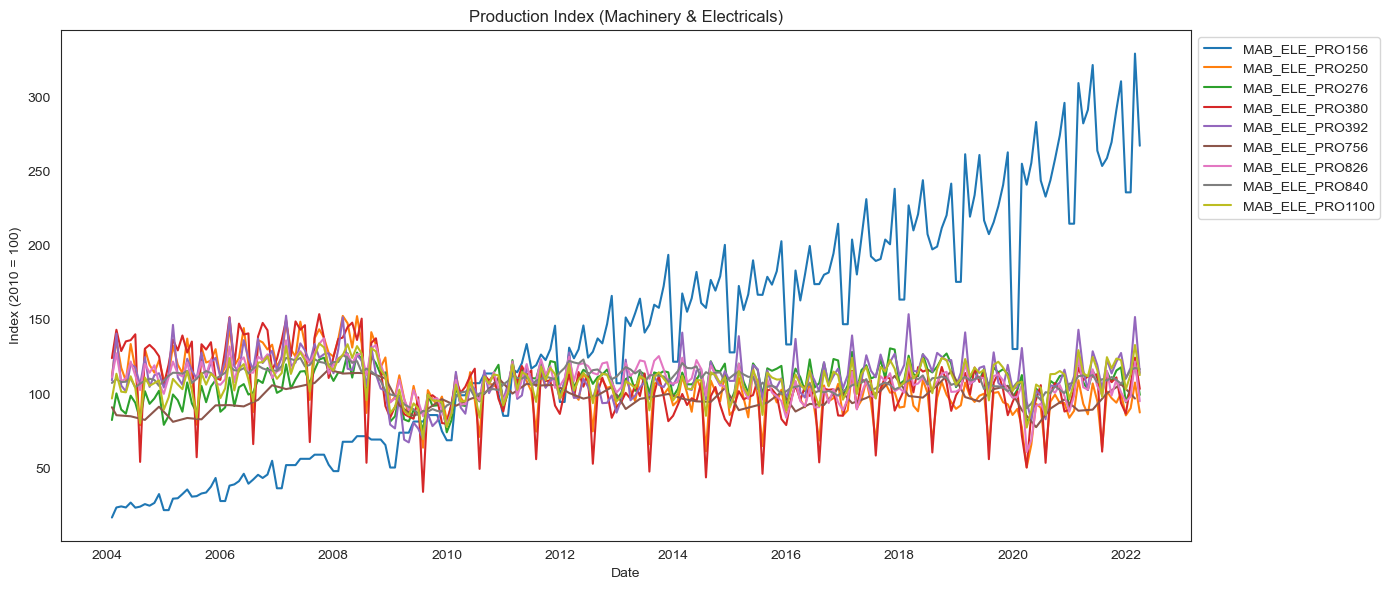

In [744]:
plt.figure(figsize=(14, 6))
for col in production_features:
    plt.plot(market_data["date"].dt.to_timestamp(), market_data[col], label=col)

plt.title("Production Index (Machinery & Electricals)")
plt.xlabel("Date")
plt.ylabel("Index (2010 = 100)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

China is the only one with a distinct production index (upward), whereas the other countries more or less seem to follow the same general trend, with Italy having string downwards peaks.

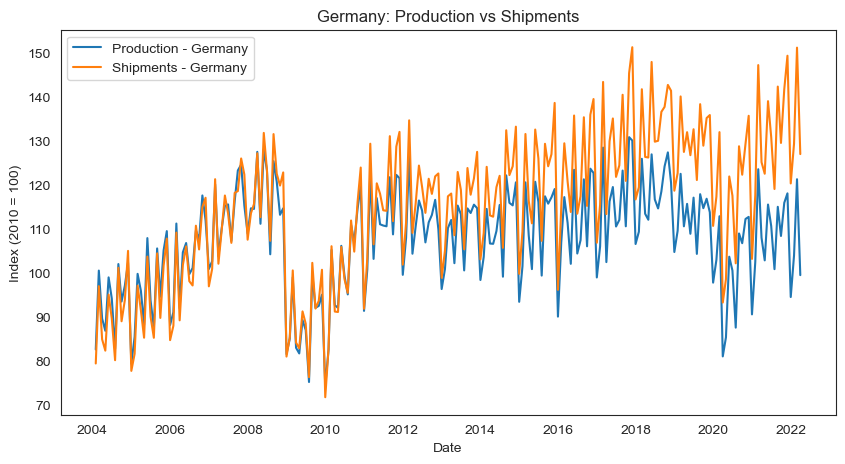

In [745]:
plt.figure(figsize=(10, 5))
plt.plot(market_data["date"].dt.to_timestamp(), market_data["MAB_ELE_PRO276"], label="Production - Germany")
plt.plot(market_data["date"].dt.to_timestamp(), market_data["MAB_ELE_SHP276"], label="Shipments - Germany")
plt.title("Germany: Production vs Shipments")
plt.xlabel("Date")
plt.ylabel("Index (2010 = 100)")
plt.legend()
plt.show()

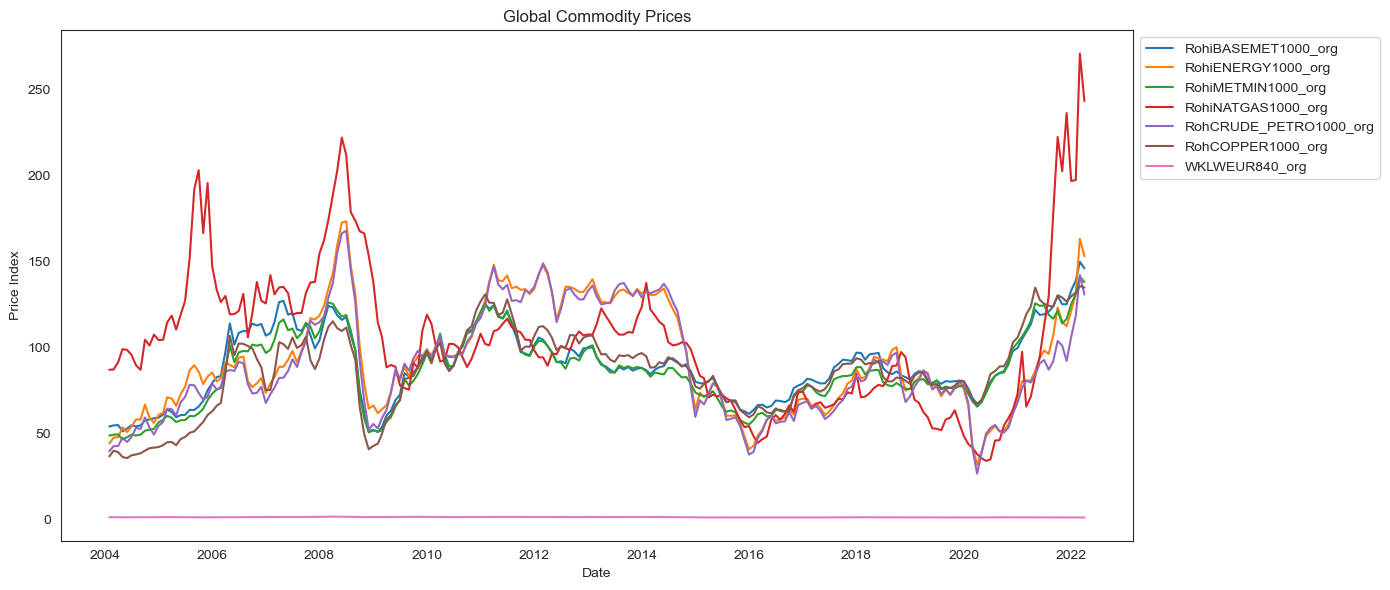

In [746]:
plt.figure(figsize=(14, 6))
for col in commodity_features:
    plt.plot(market_data["date"].dt.to_timestamp(), market_data[col], label=col)

plt.title("Global Commodity Prices")
plt.xlabel("Date")
plt.ylabel("Price Index")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

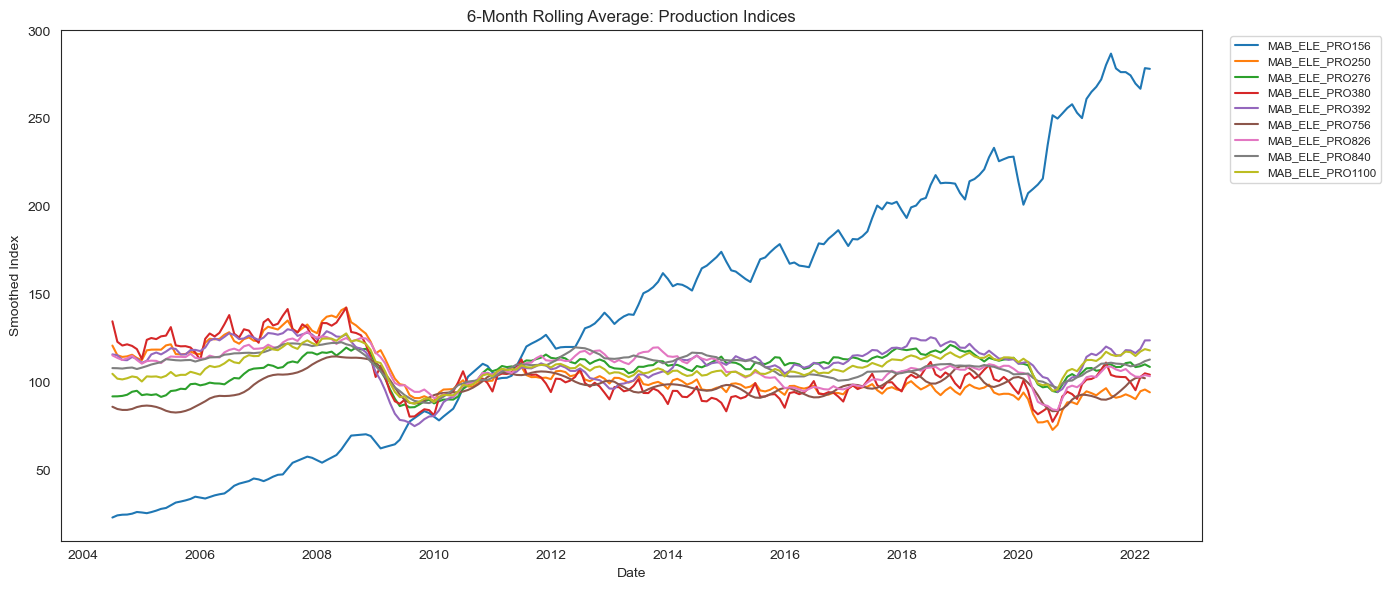

In [747]:
# Compute rolling averages
df_rolling_6 = market_data[production_features].rolling(window=6).mean()

# Second plot: 6-month rolling average
plt.figure(figsize=(14, 6))
for col in production_features:
    plt.plot(market_data["date"].dt.to_timestamp(), df_rolling_6[col], label=col)

plt.title("6-Month Rolling Average: Production Indices")
plt.xlabel("Date")
plt.ylabel("Smoothed Index")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), fontsize="small")
plt.tight_layout()
plt.show()

Rolling average smooths out short-term fluctuations in time series data by averaging values over a 6 month window. We can see growth in China’s index vs. stagnation elsewhere. Changes, such as production rebounds or shocks, e.g. financial crisis (2009-2010), COVID-19 in 2020.

<a class="anchor" id="sub-section-1_5_4_3">

#### 1.5.4.3. Correlation between market features
    
</a>

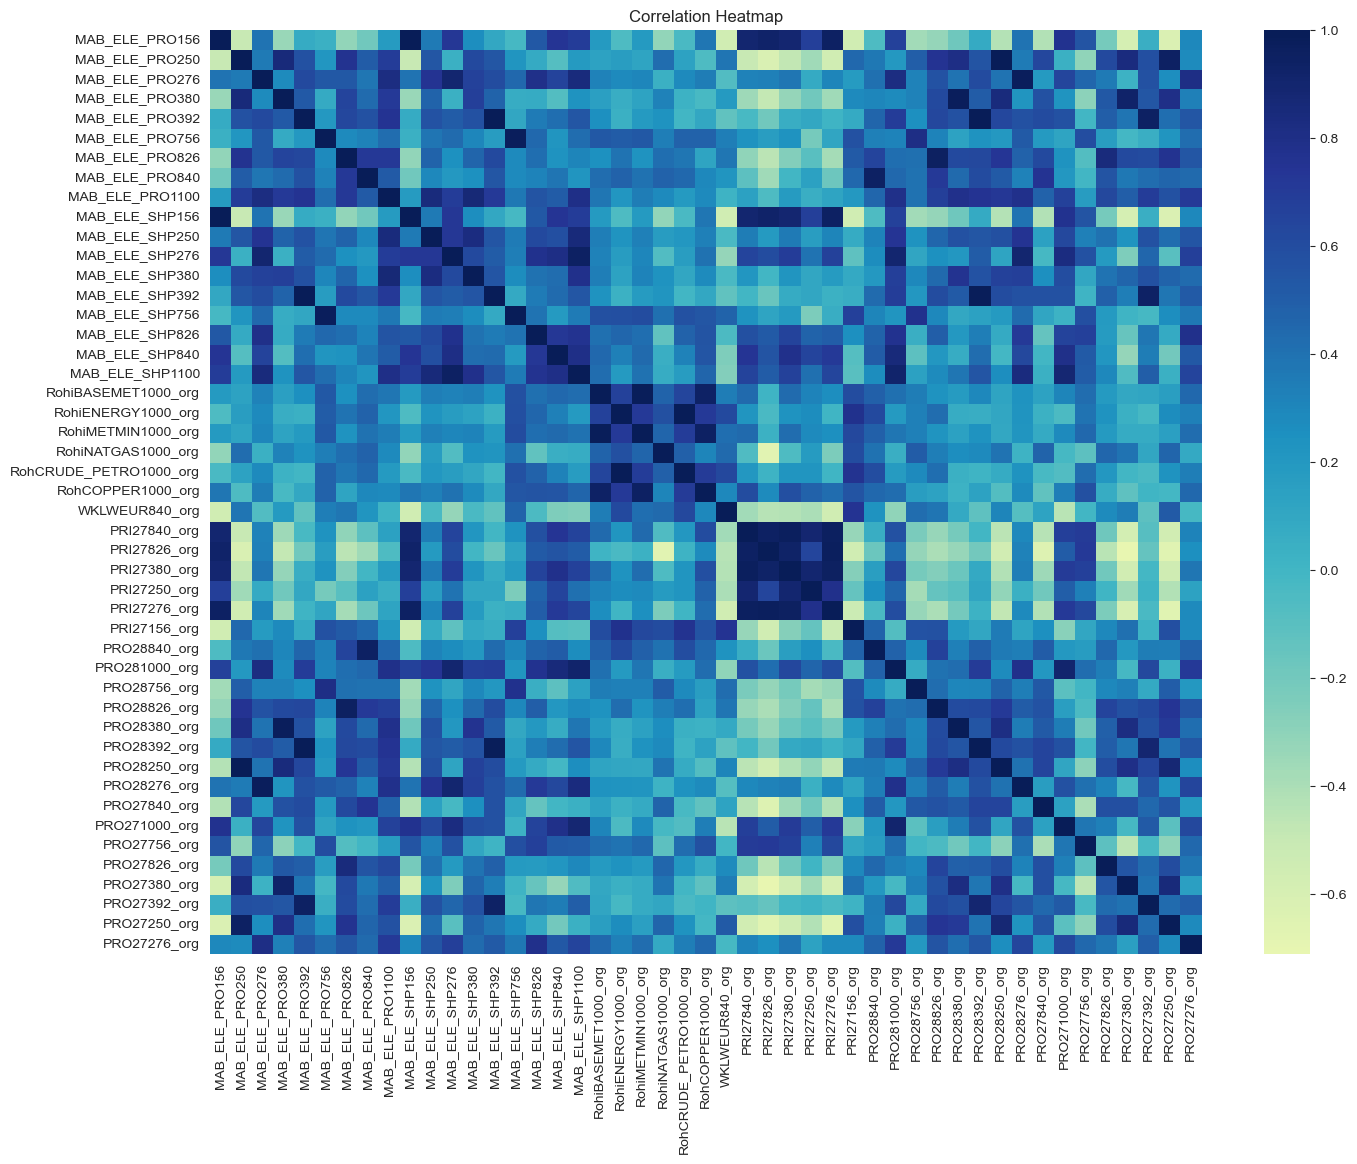

In [748]:
plt.figure(figsize=(16, 12))
corr_matrix = market_data[all_features].corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

Filter out correlations above or equal the threshold of 0.85 and ony keep one side for better interpretability.

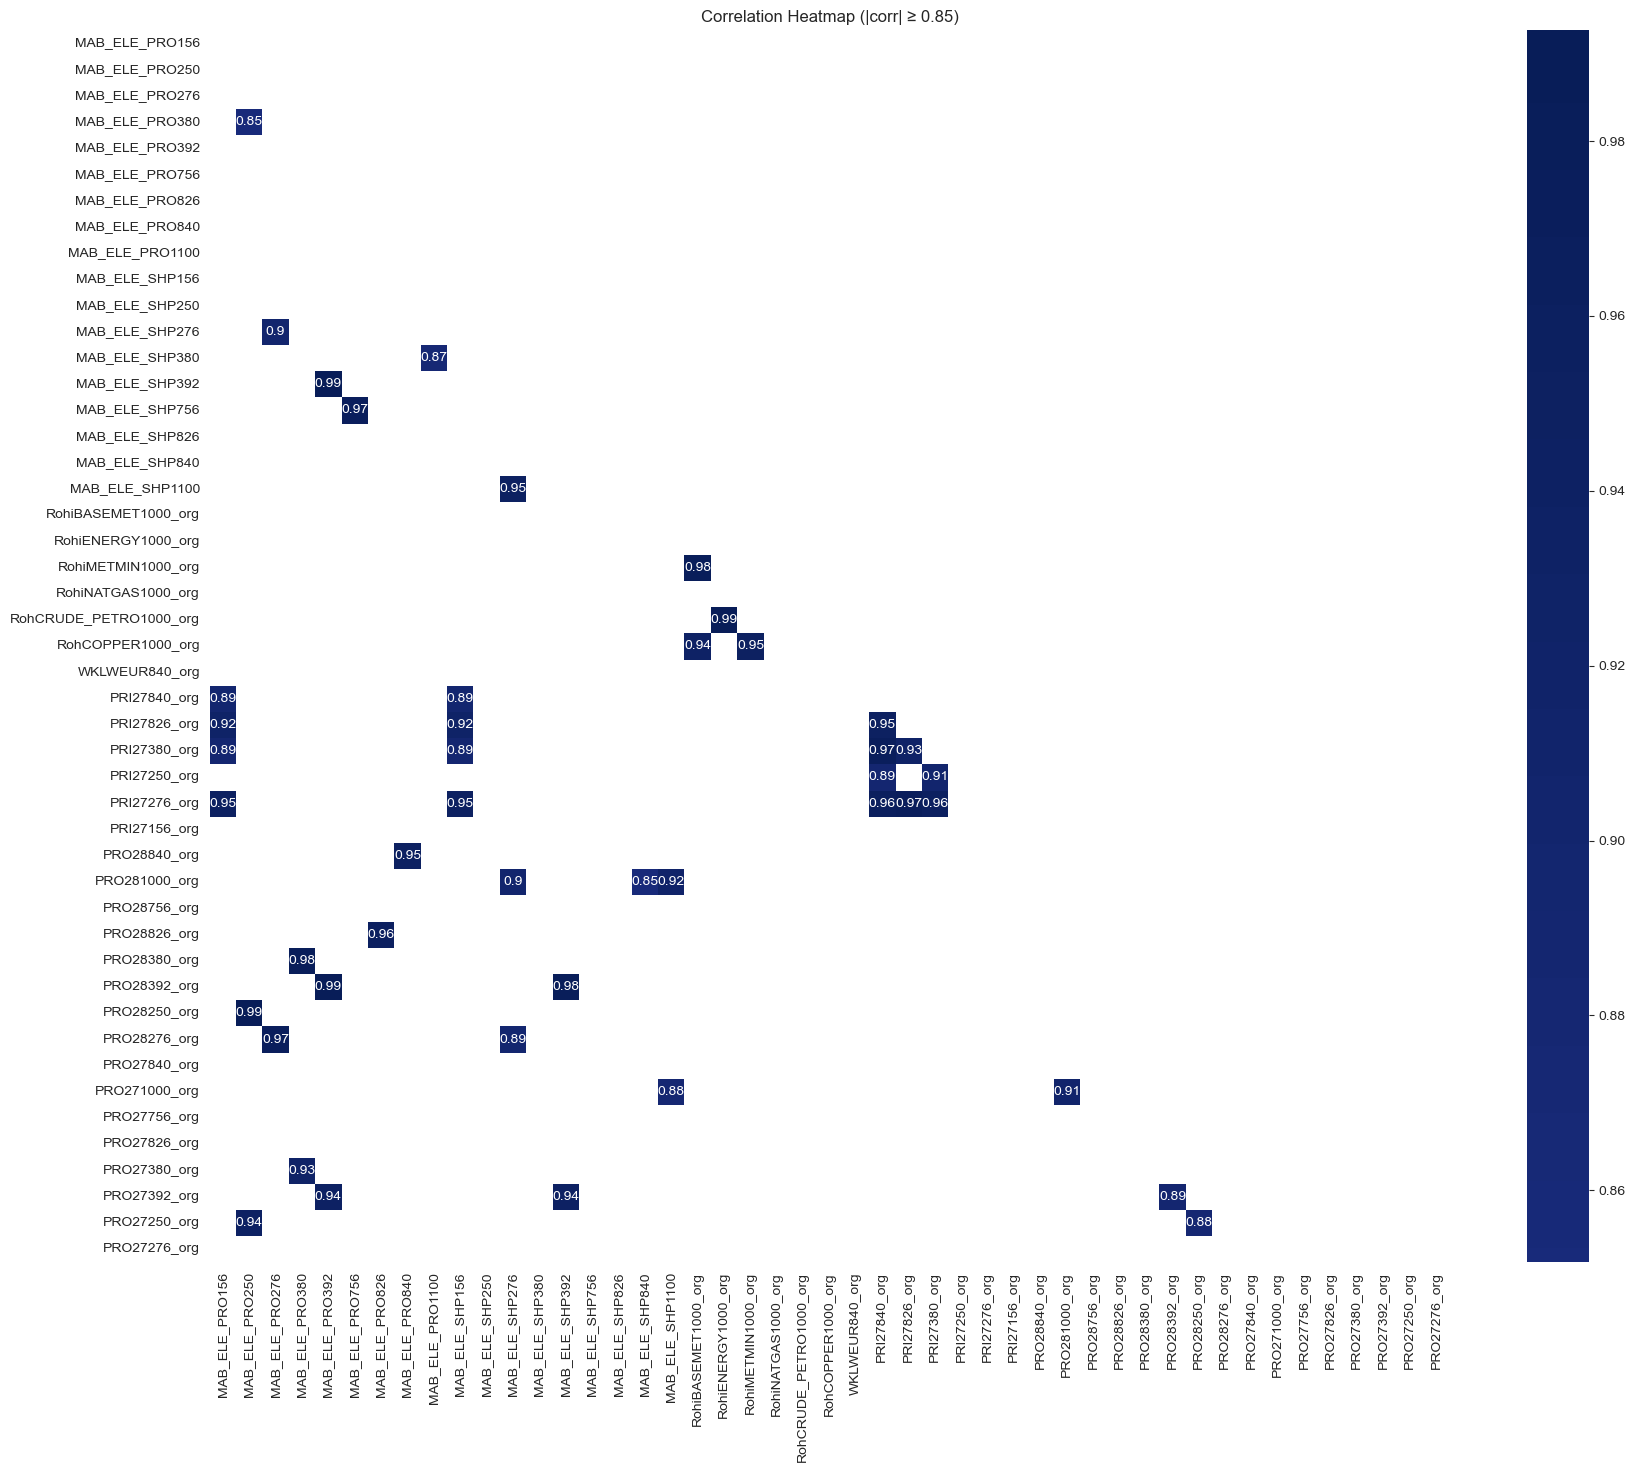

In [749]:
threshold = 0.85
filtered_corr = corr_matrix.where((corr_matrix.abs() >= threshold) & (corr_matrix.abs() != 1.0))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(filtered_corr, mask=mask, cmap='YlGnBu', center=0, annot=True)
plt.title(f"Correlation Heatmap (|corr| ≥ {threshold})")
plt.show()

Pearson correlation (i.e. linearity). Check for correlations equal and above |0.85| as features may be redundant.

In [750]:
# Identify features to drop based on correlation threshold

# Get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# List of columns to drop (keep only one from each highly correlated group)
to_drop = [col for col in upper.columns if any(upper[col].abs() > threshold)]

# Print dropped features
print(f"Features to drop (|corr| ≥ {threshold}):")
for feature in to_drop:
    print(f"- {feature}")

# Reduced feature list
reduced_features = [f for f in all_features if f not in to_drop]

Features to drop (|corr| ≥ 0.85):
- MAB_ELE_PRO380
- MAB_ELE_SHP156
- MAB_ELE_SHP276
- MAB_ELE_SHP380
- MAB_ELE_SHP392
- MAB_ELE_SHP756
- MAB_ELE_SHP1100
- RohiMETMIN1000_org
- RohCRUDE_PETRO1000_org
- RohCOPPER1000_org
- PRI27840_org
- PRI27826_org
- PRI27380_org
- PRI27250_org
- PRI27276_org
- PRO28840_org
- PRO281000_org
- PRO28826_org
- PRO28380_org
- PRO28392_org
- PRO28250_org
- PRO28276_org
- PRO271000_org
- PRO27380_org
- PRO27392_org
- PRO27250_org


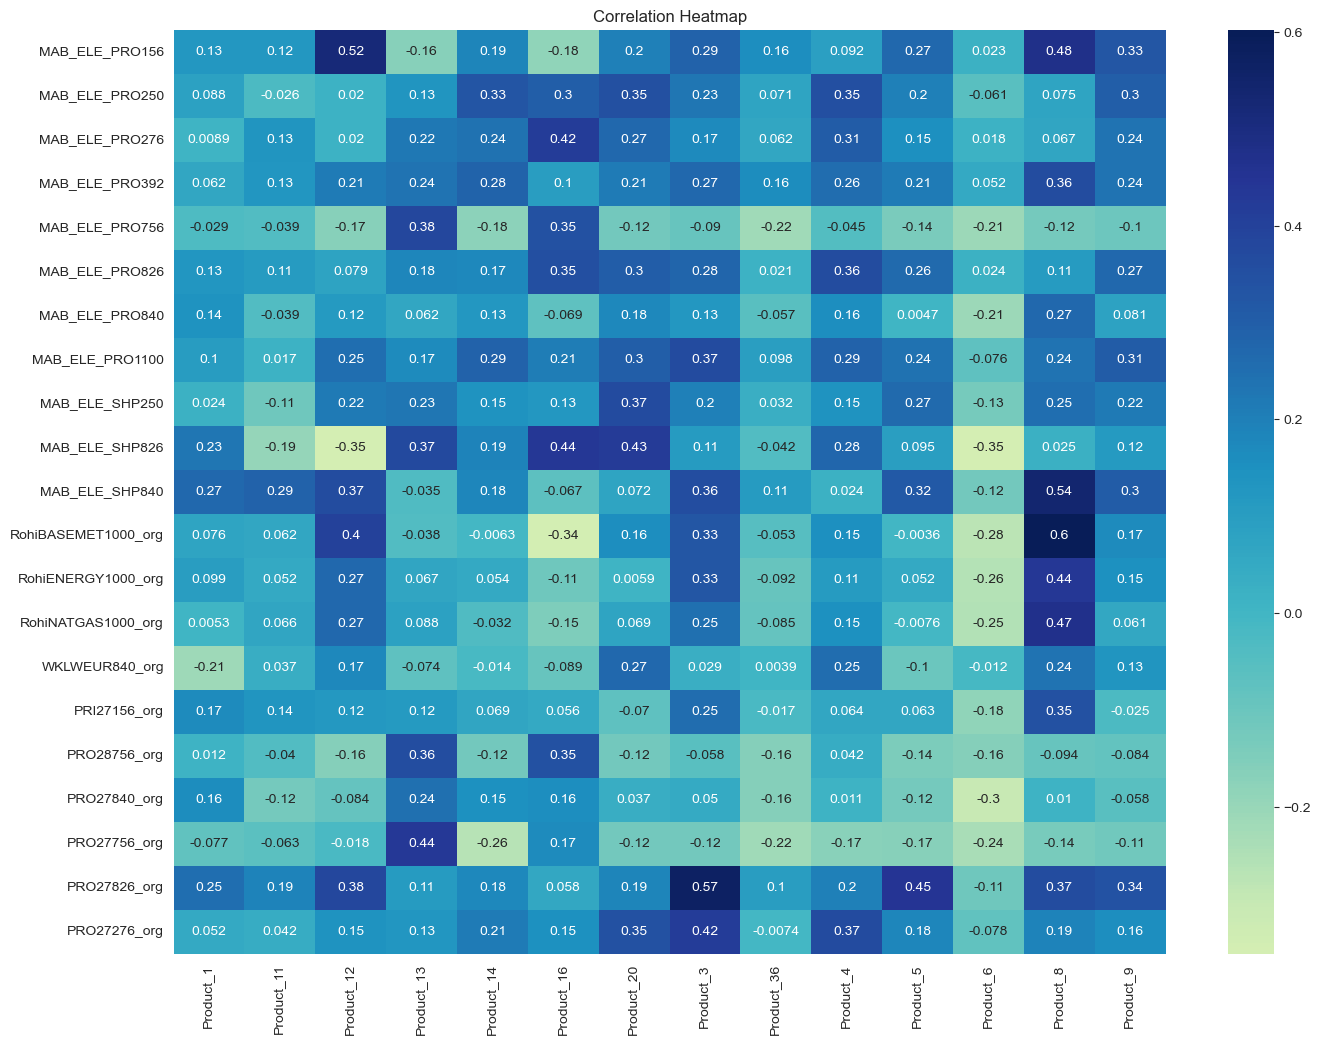

In [751]:
correlation_matrix = {}

for product in merged_data[product_columns].columns:
    correlations = merged_data[reduced_features].corrwith(merged_data[product], method='spearman')
    correlation_matrix[product] = correlations

correlation_df = pd.DataFrame(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_df, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

- MAB_ELE_PRO156: correlation with Product_3 (0.52), also positively linked to Products 5, 8, 9
- MAB_ELE_SHP840: broadly correlated across many products, especially strong with Products 5 (0.54) and 3 (0.32)
- PRO27826_org: correlations with Products 3, 5, 9
- Product 8 seems to be correlated with a few market indicators
- RohiENERGY1000_org and RohiNATGAS1000_org (except for product 8)
- WKLWEUR840_org: mostly weak or negative correlations

<a class="anchor" id="sub-section-1_5_4_4">

#### 1.5.4.4. Correlation between product features
    
</a>

This is to see if any products are linearly correlated with each other.

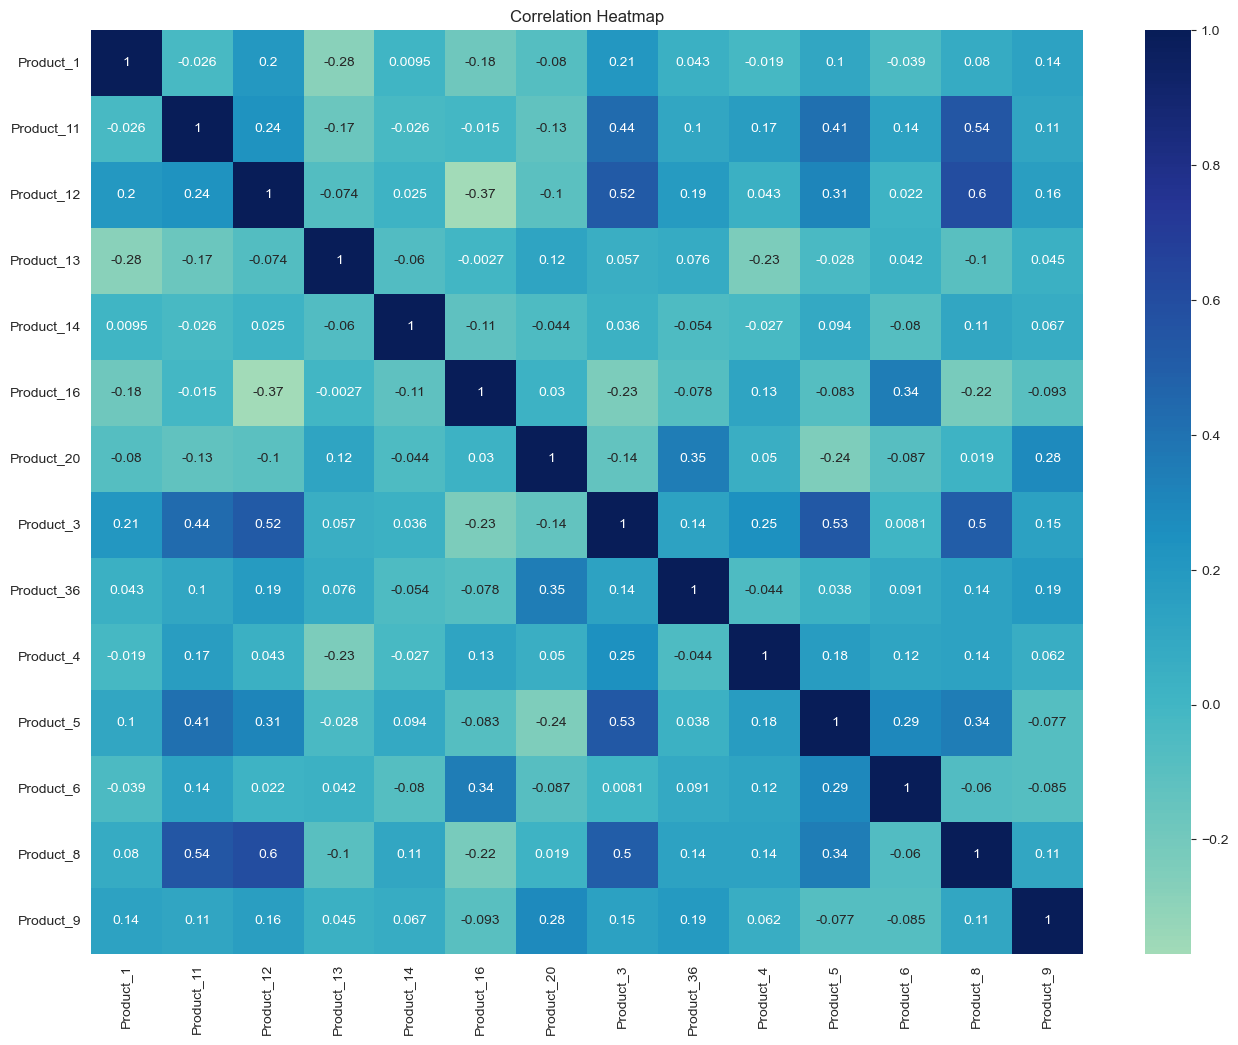

In [752]:
plt.figure(figsize=(16, 12))
corr_matrix = merged_data[product_columns].corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Maybe product 3 and 12, 8 and 12, 8 and 11, 5 and 3? Also quite a few negative correlations.

<a class="anchor" id="sub-section-1_5_4_5">

#### 1.5.4.5. Correlation between market features and products
    
</a>

Spearman correlation: non-parametric measure that assesses how well the relationship between two variables can be described using a monotonic function. 
- Rank the data and then compute the correlation between the ranks. 
- More robust to outliers and better suited for detecting non-linear but monotonic trends. 

In the context of time series with cyclical patterns—such as product sales and production features—Spearman correlation offers a quick and insightful way to uncover underlying relationships that may not be strictly linear. However, it does not account for the temporal structure of the data (e.g., lags or seasonality), so while useful for initial exploration, it may overlook important time-dependent dynamics.

Here we are checking all features and see if we can get extra insights and if it aligns with the reduced features.

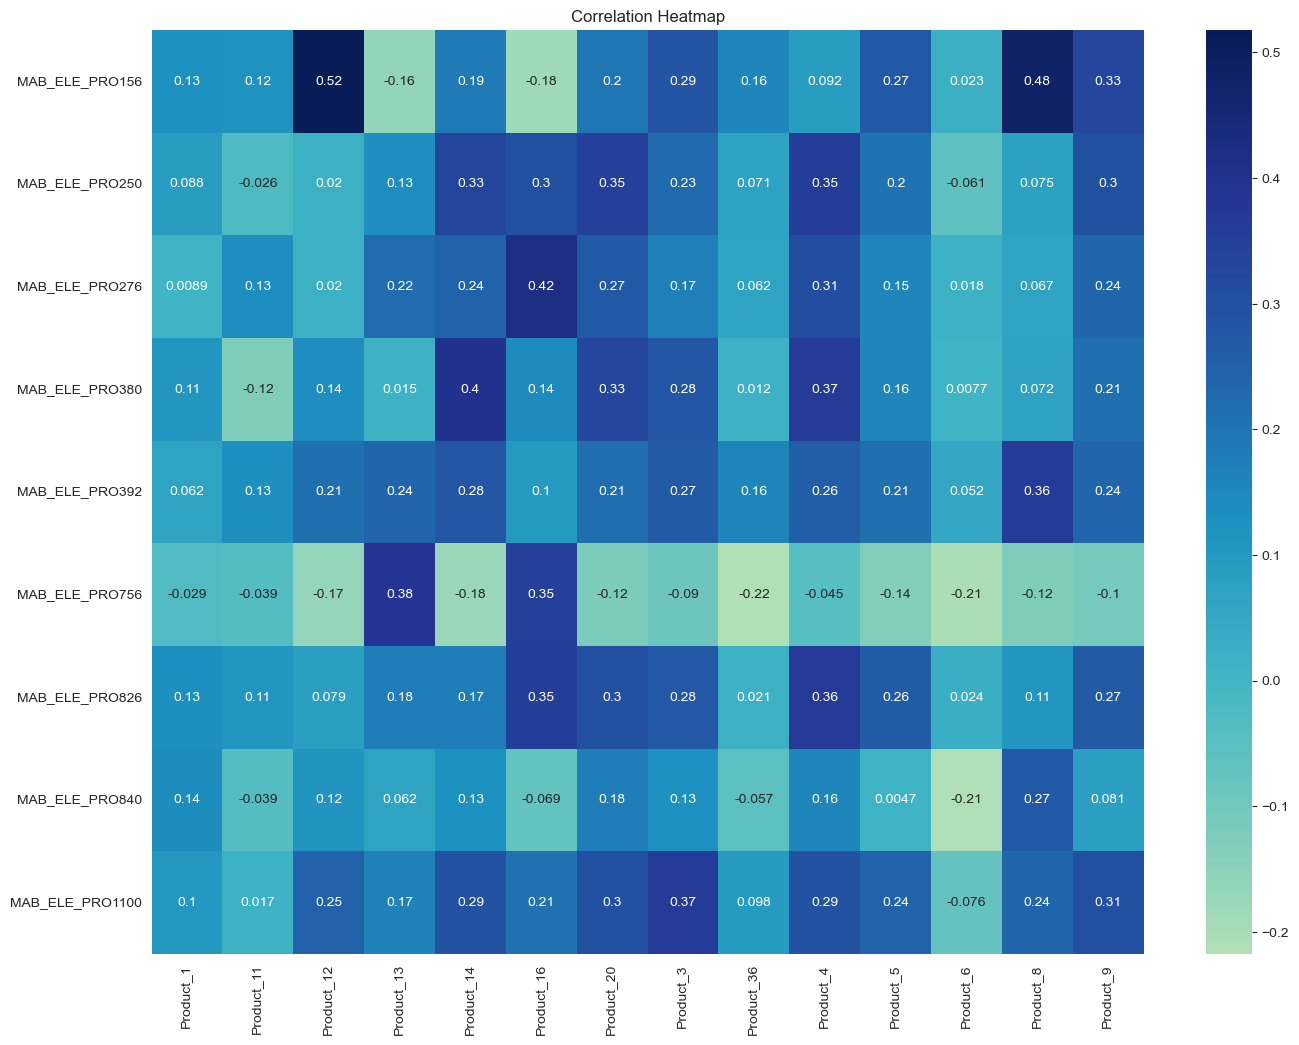

In [753]:
correlation_matrix = {}

for product in merged_data[product_columns].columns:
    correlations = merged_data[production_features].corrwith(merged_data[product], method='spearman')
    correlation_matrix[product] = correlations

correlation_df = pd.DataFrame(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_df, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

MAB_ELE_PRO156 and product 12/ 8

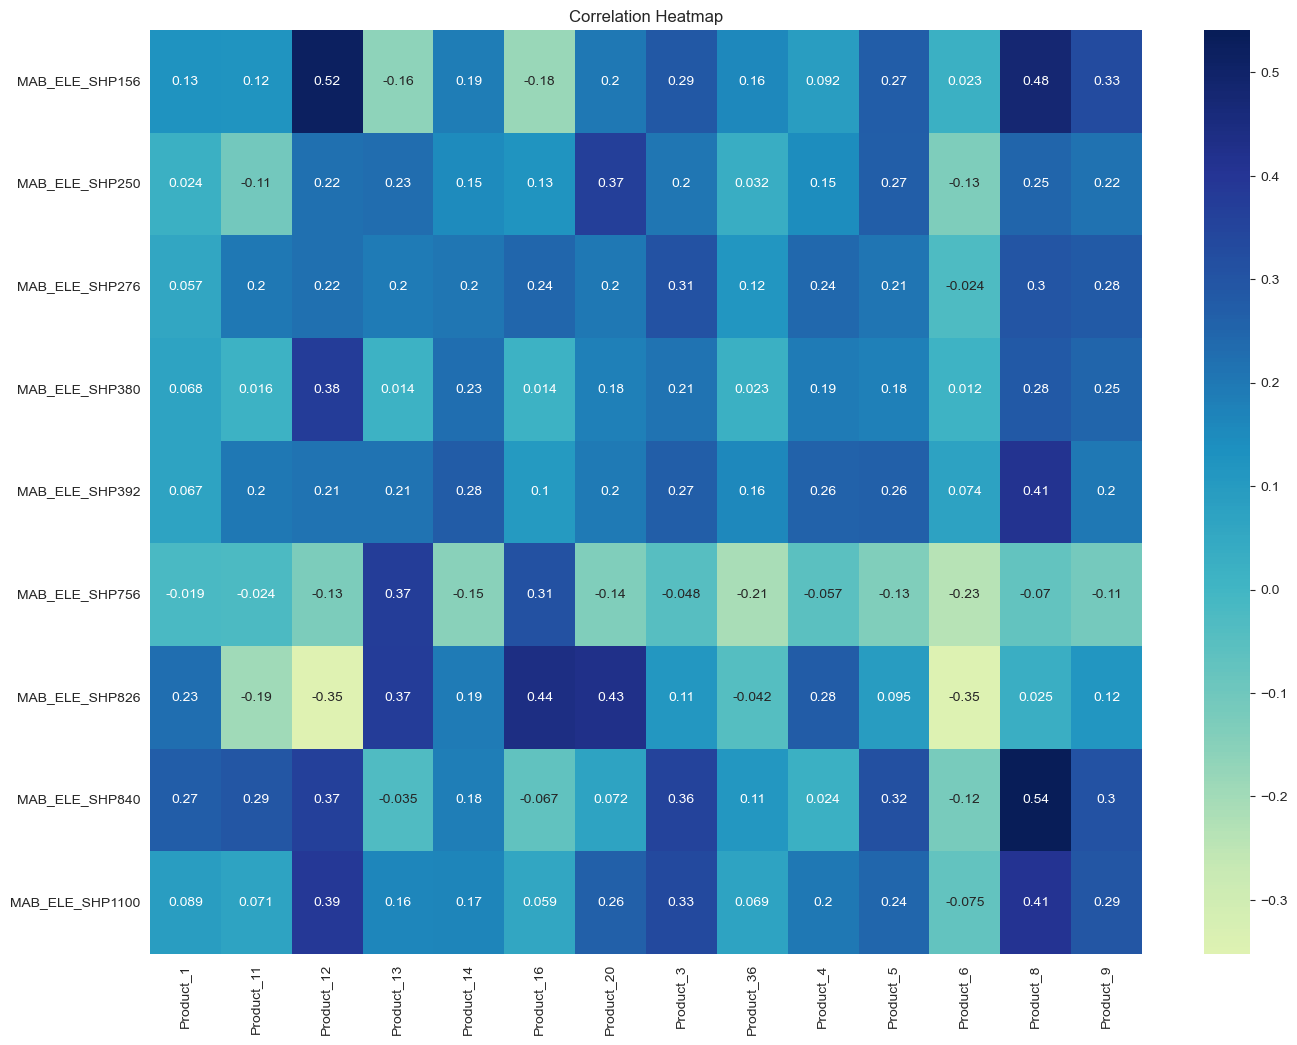

In [754]:
correlation_matrix = {}

for product in merged_data[product_columns].columns:
    correlations = merged_data[shipment_features].corrwith(merged_data[product], method='spearman')
    correlation_matrix[product] = correlations

correlation_df = pd.DataFrame(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_df, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

- MAB_ELE_SHP156 and product 12/ 8
- MAB_ELE_SHP840 and product 8

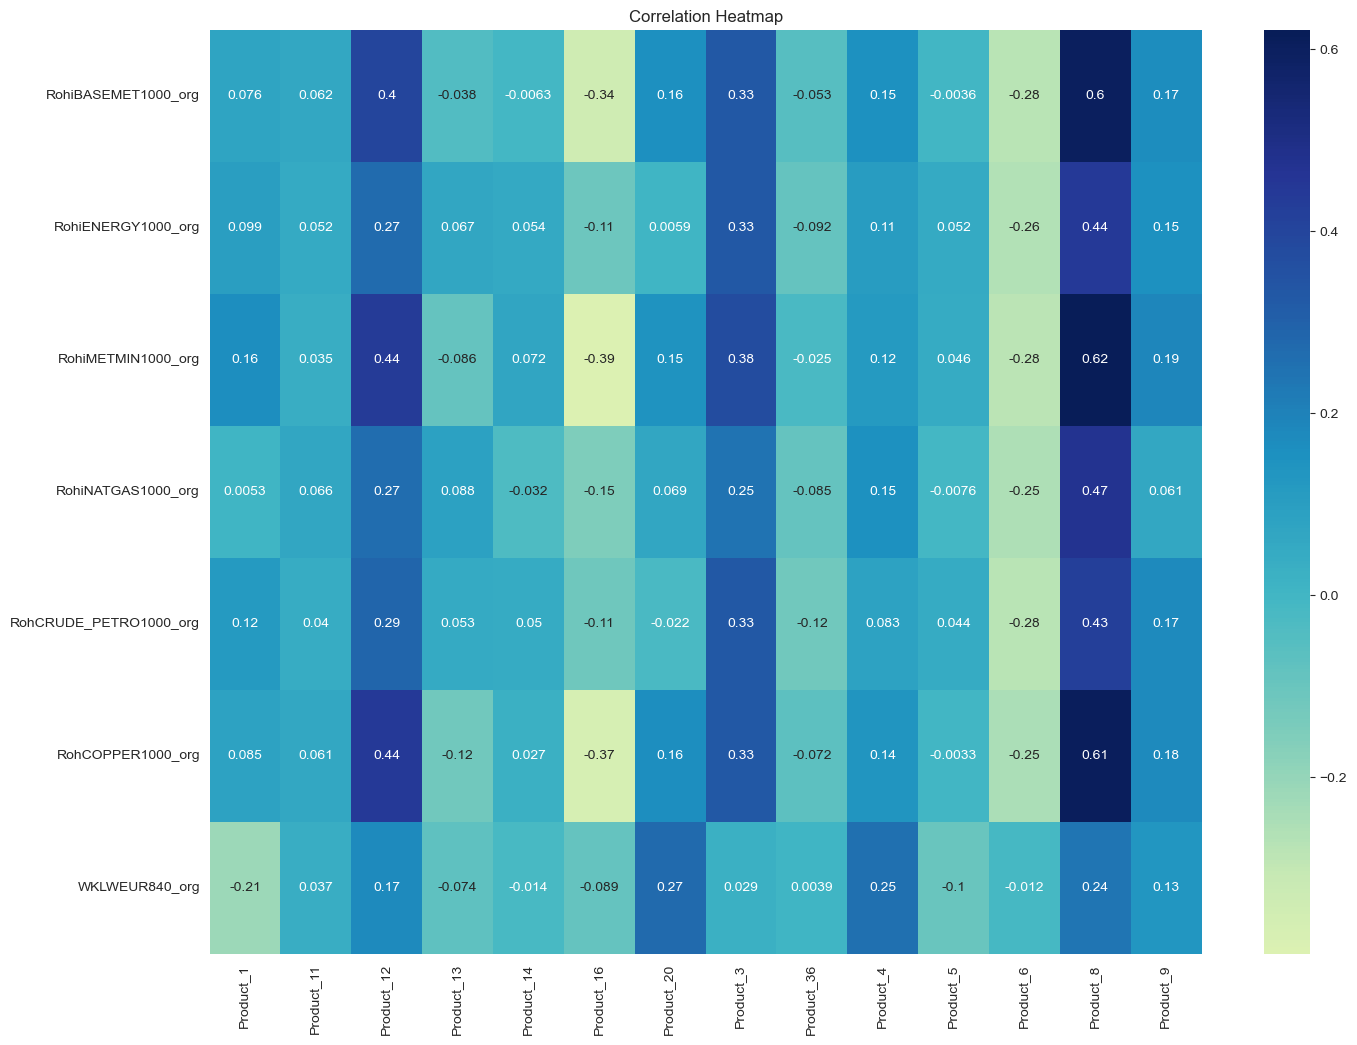

In [755]:
correlation_matrix = {}

for product in merged_data[product_columns].columns:
    correlations = merged_data[commodity_features].corrwith(merged_data[product], method='spearman')
    correlation_matrix[product] = correlations

correlation_df = pd.DataFrame(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_df, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Most commodity columns are correlated with product 8 (and less strongly with products 12 and 3). Commodities are negatively correlated with product 6.

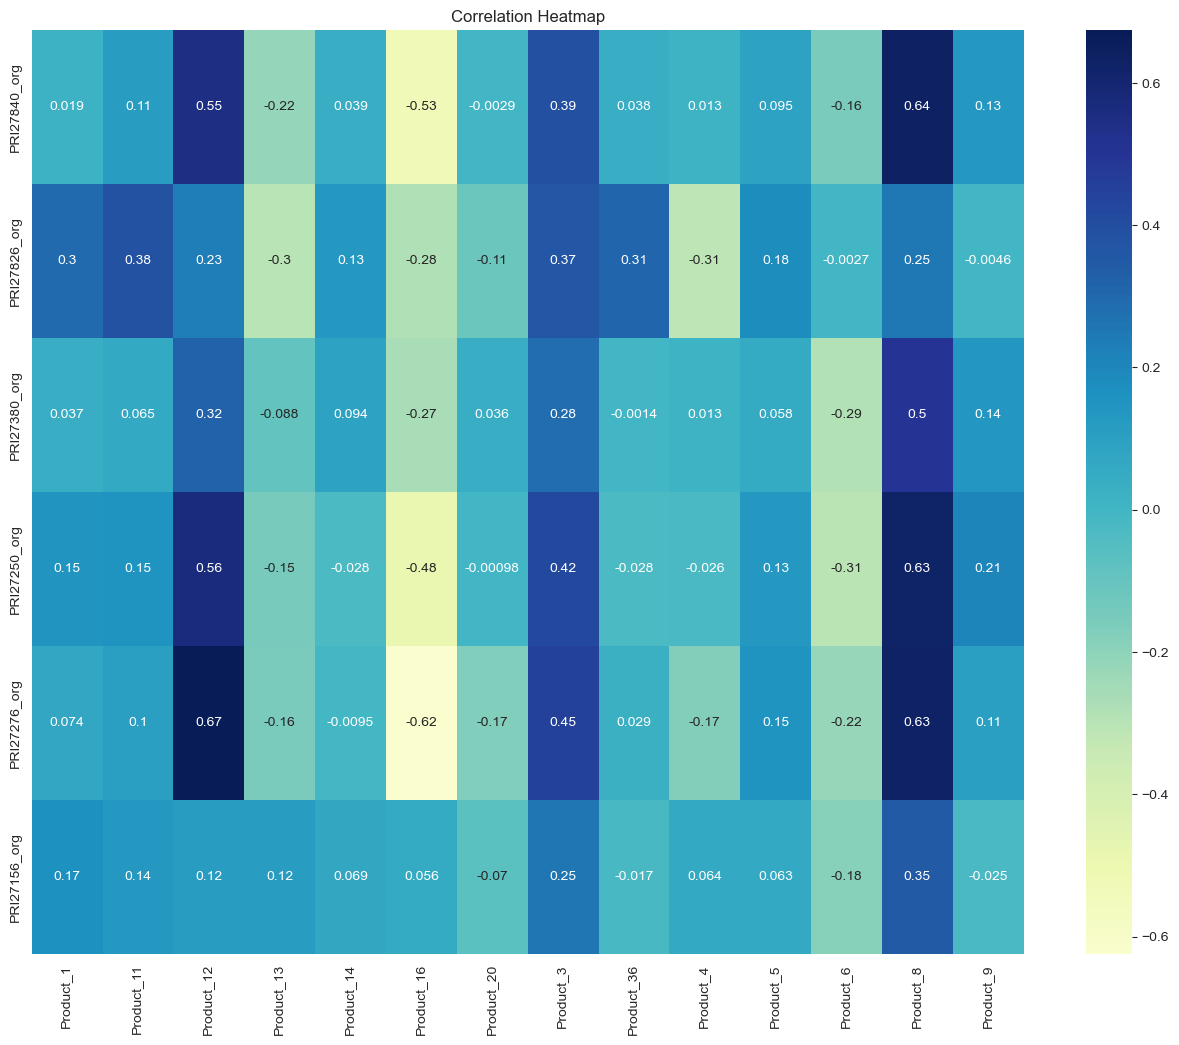

In [756]:
correlation_matrix = {}

for product in merged_data[product_columns].columns:
    correlations = merged_data[producer_price_features].corrwith(merged_data[product], method='spearman')
    correlation_matrix[product] = correlations

correlation_df = pd.DataFrame(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_df, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

Producer prices seem to be correlated with products 12 and 8 (and 3), while product16 is mainly negatively correlated.

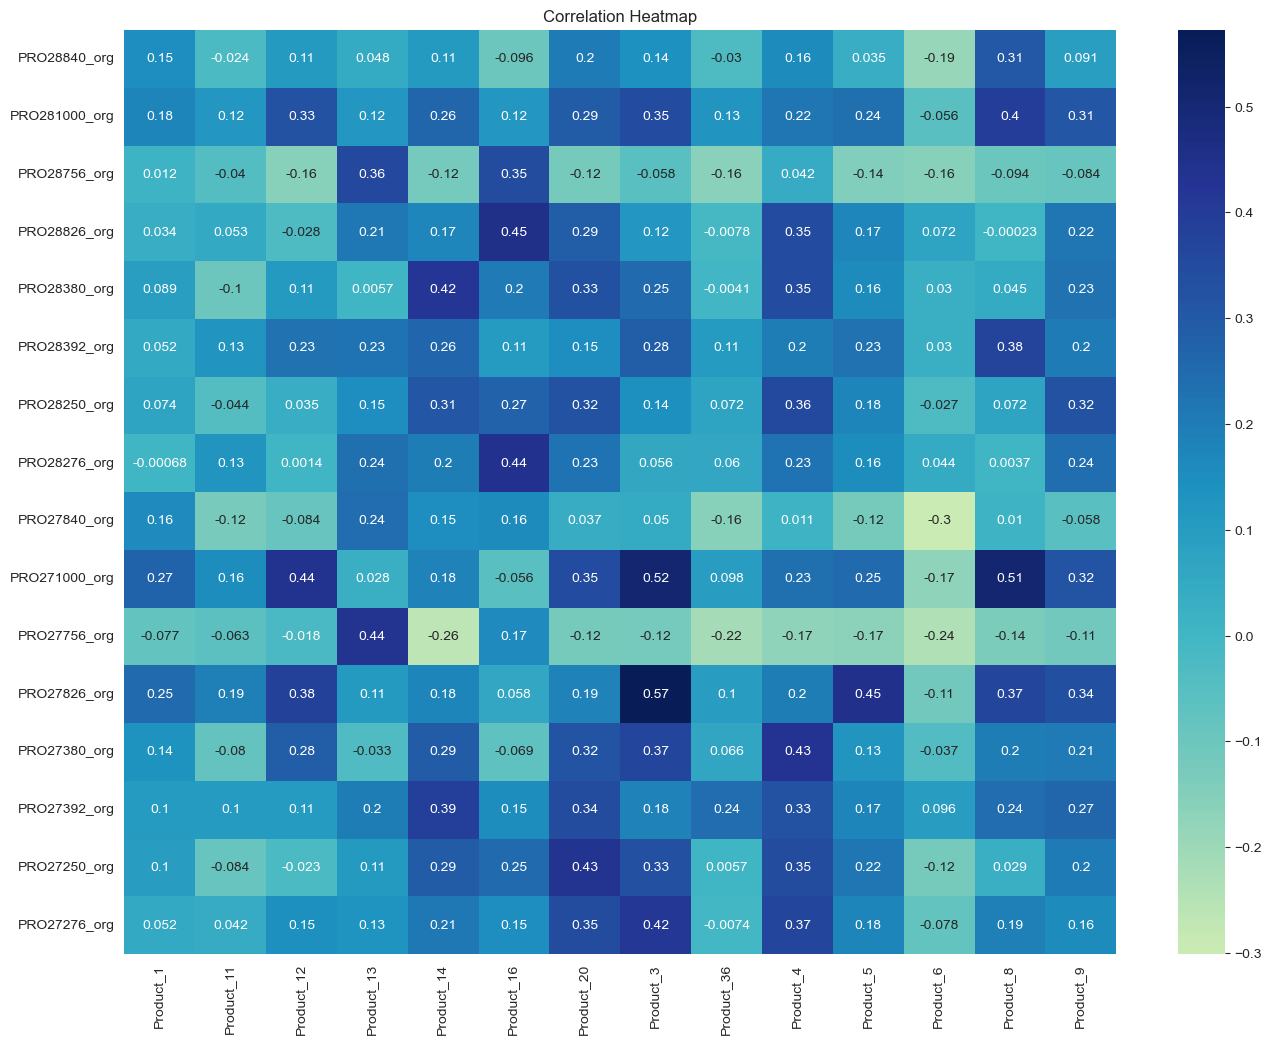

In [757]:
correlation_matrix = {}

for product in merged_data[product_columns].columns:
    correlations = merged_data[broad_production_features].corrwith(merged_data[product], method='spearman')
    correlation_matrix[product] = correlations

correlation_df = pd.DataFrame(correlation_matrix)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_df, cmap='YlGnBu', center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

<a class="anchor" id="chapter2"></a>

# 2. Data Preparation

</a>

<a class="anchor" id="sub-section-2_1"></a>

## 2.1. Coherence Check

</a>

<a class="anchor" id="sub-section-2_2"></a>

## 2.2. Feature Engineering

</a>

In [758]:
sales_data.columns

Index(['DATE', 'Mapped_GCK', 'Sales_EUR', 'date'], dtype='object')

In [759]:
df = sales_data.copy()

In [760]:
# Set 'date' as index 
monthly_product_sales.set_index('date', inplace = True)
# Add sales volume per product
df = monthly_product_sales[product_columns] # target variables

In [761]:
# For seasonality
df['month'] = df.index.month
df['year'] = df.index.year

In [762]:
# Useful for models like XGBoost
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

In [763]:
# 1 month lag average sales over the past 3 months for trends and seasonality
for col in product_columns:
    df[f'{col}_rolling_mean_3m'] = df[col].rolling(window=3).mean().shift(1)

In [764]:
# 1 month lag 3-month rolling standard deviation to capture volatility
for col in product_columns:
    df[f'{col}_rolling_std_3m'] = df[col].rolling(window=3).std().shift(1)

In [765]:
# Sales rank (per month) for competitive ranking
df['top_product'] = df[product_columns].idxmax(axis=1).shift(1)

In [767]:
df.head()

Product_1   Product_11  Product_12  Product_13  Product_14  \
date                                                                     
2018-10 36098918.7900 1021303.5000  28686.3300  27666.1000   5770.0000   
2018-11  5140760.0000 1898844.8000   1070.0000  68180.0000  17130.0000   
2018-12 37889612.1200 1226122.0000  17880.6000  15655.1800      0.0000   
2019-01 27728148.3500 2216391.7400  21484.0000  27198.2900   1686.4000   
2019-02 34793163.5300  610456.6000  34214.7400  32638.6300  19196.3000   

          Product_16  Product_20     Product_3  Product_36   Product_4  \
date                                                                     
2018-10  333196.8700   4563.1400  8089465.9600   6474.6000 397760.6900   
2018-11 1377694.3200   5798.1400 11863001.5100  21617.6100 371322.4200   
2018-12 4762524.6600    918.6500  8736859.3900  13924.5200 430100.9600   
2019-01  942957.1900   2398.0400 10705300.6300  15444.3900 484173.8800   
2019-02  257765.0400    620.6600 10167796.8600   8051.1500 620031.8000   

           Product_5   Product_6   Product_8  Product_9  month  year  \
date                                                                   
2018-10 2499061.1900 369231.6000 586052.7400  3219.3200     10  2018   
2018-11 8993944.0400 473046.9600 526292.7700  1875.9000     11  2018   
2018-12 6947507.3100 999472.6900 271490.7100     0.0000     12  2018   
2019-01 8233205.0700 598874.1000 381400.1500  1487.0000      1  2019   
2019-02 6879250.9900 542037.5200 368475.5700  3234.2800      2  2019   

         month_sin  month_cos  Product_1_rolling_mean_3m  \
date                                                       
2018-10    -0.8660     0.5000                        NaN   
2018-11    -0.5000     0.8660                        NaN   
2018-12    -0.0000     1.0000                        NaN   
2019-01     0.5000     0.8660              26376430.3033   
2019-02     0.8660     0.5000              23586173.4900   

         Product_11_rolling_mean_3m  Product_12_rolling_mean_3m  \
date                                                              
2018-10                         NaN                         NaN   
2018-11                         NaN                         NaN   
2018-12                         NaN                         NaN   
2019-01                1382090.1000                  15878.9767   
2019-02                1780452.8467                  13478.2000   

         Product_13_rolling_mean_3m  Product_14_rolling_mean_3m  \
date                                                              
2018-10                         NaN                         NaN   
2018-11                         NaN                         NaN   
2018-12                         NaN                         NaN   
2019-01                  37167.0933                   7633.3333   
2019-02                  37011.1567                   6272.1333   

         Product_16_rolling_mean_3m  Product_20_rolling_mean_3m  \
date                                                              
2018-10                         NaN                         NaN   
2018-11                         NaN                         NaN   
2018-12                         NaN                         NaN   
2019-01                2157805.2833                   3759.9767   
2019-02                2361058.7233                   3038.2767   

         Product_3_rolling_mean_3m  Product_36_rolling_mean_3m  \
date                                                             
2018-10                        NaN                         NaN   
2018-11                        NaN                         NaN   
2018-12                        NaN                         NaN   
2019-01               9563108.9533                  14005.5767   
2019-02              10435053.8433                  16995.5067   

         Product_4_rolling_mean_3m  Product_5_rolling_mean_3m  \
date                                                            
2018-10                        NaN           

In [ ]:
# Seem to be important
df['PRO27826_org_lag1'] = df['PRO27826_org'].shift(1)  # UK prod index
df['PRI27156_org_lag1'] = df['PRI27156_org'].shift(1)  # China producer prices

<a class="anchor" id="sub-section-2_3"></a>

## 2.3. Splitting Data

</a>

The dataset was restricted to the period after October 2018, as this marks the beginning of available sales data. Any records prior to this date were excluded due to missing target values, which would not contribute to supervised model training.

The filtered dataset (October 2018 – April 2022) was then split into two main parts:
- Training Set: October 2018 – December 2021
- Test Set: January 2022 – April 2022

**Hold-Out Validation within the Training Period.** To further tune and evaluate the model before final testing, a hold-out validation set was created from the training period:
- Model Training Period: October 2018 – December 2020
- Validation Period: January 2021 – December 2021

This strategy respects the chronological order of the data and avoids leakage from future values into training. It allows performance metrics to be computed on a realistic validation window before testing the final model on the test set (2022 data).

In [222]:
df = merged_data[merged_data['date'] >= '2018-10']

In [224]:
train = df[df['date'] < '2022-01']
test = df[df['date'] >= '2022-01']

In [227]:
all_columns = train.columns.tolist()
feature_cols = [col for col in all_columns if col not in product_columns]
target_col = product_columns

In [228]:
train_data = train[(train['date'] >= '2018-10') & (train['date'] <= '2020-12')]
val_data   = train[(train['date'] >= '2021-01') & (train['date'] <= '2021-12')]

X_train = train_data[feature_cols]
y_train = train_data[target_col]
X_val   = val_data[feature_cols]
y_val   = val_data[target_col]

<a class="anchor" id="sub-section-2_4"></a>

## 2.4. Outliers

</a>

TypeError: unsupported operand type(s) for +: 'Period' and 'Period'

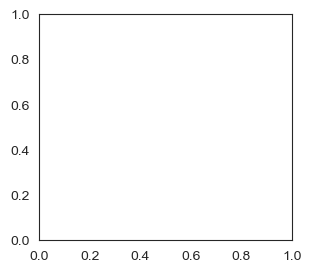

In [229]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(X_train[col].dropna(), vert=False)
    plt.title(f'{col} (after outlier removal)')
plt.tight_layout()
plt.show()